In [2]:
## Importing libraries

from datetime import datetime, date, timedelta
from IPython.display import display, clear_output
import time
from array import *
import numpy as np
import gc
from pathlib import Path
import matplotlib.pyplot as plt
import matplotlib
from pylab import savefig
import seaborn as sns
import pandas as pd
import csv
import json
import math
import datetime as dt
import pymongo as pym
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor, VotingRegressor
from xgboost import XGBRegressor
import joblib

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/urllib3/__init__.py:34: NotOpenSSLWarning: urllib3 v2.0 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [3]:
## Connect to the database and extract the desired information based on the specified parameters


# Variables to connect to the DB
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

# Fetch data from the database (containing all apps and respective SSDs) based on specified parameters
mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)

# Variables to connect to the DB
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["SMARTAttributesFilterFull"]
mycol = mydb["s_m_a_r_t_att_full"]

myquerySMARTAtt = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "_id":0}  
myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "r_sectors":1, "n_b_written":1, "w_r_d":1, "_id":0}

# Fetch data from the database (containing smart attributes and respective SSDs) based on specified parameters
mydocSMARTAtt = mycol.find(myquerySMARTAtt, myfieldsSMARTAtt)

# Convert into a dataframe
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listSMARTAtt = list(mydocSMARTAtt)
dfSMARTAtt =  pd.DataFrame(listSMARTAtt)

# Add a column to identify the SSD model
dfSMARTAtt["model_y"] = "B2"

# Merge the two dataframes based on disk ID, model, and application
result = pd.merge(dfSMARTAtt, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

# %%
#maxWearValue = result["w_r_d"].max()

In [ ]:
## Saving merged dataframe into a csv file

model= "B2"

result.to_csv('SplittedDatasetSSD/' + 'extractedattributes' + model + '.csv')

In [ ]:
## Connect to the database and extract the desired information based on the specified parameters

# Variables to connect to the DB
myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["AllAppsSSDsLocation"]
mycol = mydb["all_apps_s_s_ds_location"]

myqueryAllAppsSSDsLocation = { "model_y": { "$eq": "B2" }}
myfieldsAllAppsSSDsLocation = {"disk_id":1, "model_y":1, "app":1, "_id":0}

# Fetch data from the database (containing all apps and respective SSDs) based on specified parameters
mydocAllAppsSSDsLocation = mycol.find(myqueryAllAppsSSDsLocation, myfieldsAllAppsSSDsLocation)


myclient = pym.MongoClient("mongodb://localhost:27017/")
mydb = myclient["OverTimeSSDsFailures"]
mycol = mydb["over_time_s_s_ds_failures"]

myqueryFailureTime = { "model_x": { "$eq": "MB2" }}
#myfieldsSMARTAtt = {"disk_id":1, "w_r_d":1, "_id":0}
#myfieldsSMARTAtt = {"disk_id":1, "timestamp":1, "n_b_written":1, "_id":0}
myfieldsFailureTime = {"disk_id":1, "failure_time":1, "_id":0}

# Fetch data from the database (containing all SSD failures) based on specified parameters
mydocFailureTime = mycol.find(myqueryFailureTime, myfieldsFailureTime)

# Convert into a dataframe
listAllAppsSSDsLocation = list(mydocAllAppsSSDsLocation)
dfAllAppsSSDsLocation =  pd.DataFrame(listAllAppsSSDsLocation)

listFailureTime = list(mydocFailureTime)
dfFailureTime =  pd.DataFrame(listFailureTime)

# Add a column to identify the SSD model
dfFailureTime["model_y"] = "B2"

# Merge the two dataframes based on disk ID, model, and application
resultSSDFailures = pd.merge(dfFailureTime, dfAllAppsSSDsLocation[['disk_id', 'model_y', 'app']], on=['disk_id', 'model_y'], how='inner')

In [ ]:
## Saving merged dataframe into a csv file

model= "B2"

resultSSDFailures.to_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [3]:
## When necessary load previously created csv's

model= "B2"

result = pd.read_csv('../../../../Downloads/' + 'extractedattributes' + model + '.csv')
resultSSDFailures = pd.read_csv('SplittedDatasetSSD/' + 'extractedfailures' + model + '.csv')

In [22]:
# Display a concise summary of the dataframe including data types and non-null values

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype  
---  ------        -----  
 0   Unnamed: 0.1  int64  
 1   Unnamed: 0    int64  
 2   disk_id       float64
 3   timestamp     object 
 4   r_sectors     float64
 5   n_b_written   float64
 6   w_r_d         float64
 7   model_y       object 
 8   app           object 
dtypes: float64(4), int64(2), object(3)
memory usage: 2.1+ GB


In [59]:
# Display a concise summary of the dataframe including data types and non-null values

resultSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 604 entries, 0 to 603
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    604 non-null    int64  
 1   disk_id       604 non-null    float64
 2   failure_time  604 non-null    object 
 3   model_y       604 non-null    object 
 4   app           604 non-null    object 
dtypes: float64(1), int64(1), object(3)
memory usage: 23.7+ KB


N Blocks written x Wear Leveling

In [9]:
## group per day (daily mean) - per app

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written', 'w_r_d']].mean()

In [11]:
## Displays the first few rows of the 'group' dataframe.

group.head()

timestamp   app  n_b_written  w_r_d
0  2018-01-01    RM          NaN    NaN
1  2018-01-01    WS          NaN    NaN
2  2018-01-01  none          NaN    NaN
3  2018-01-02   DAE          NaN    NaN
4  2018-01-02    DB          NaN    NaN

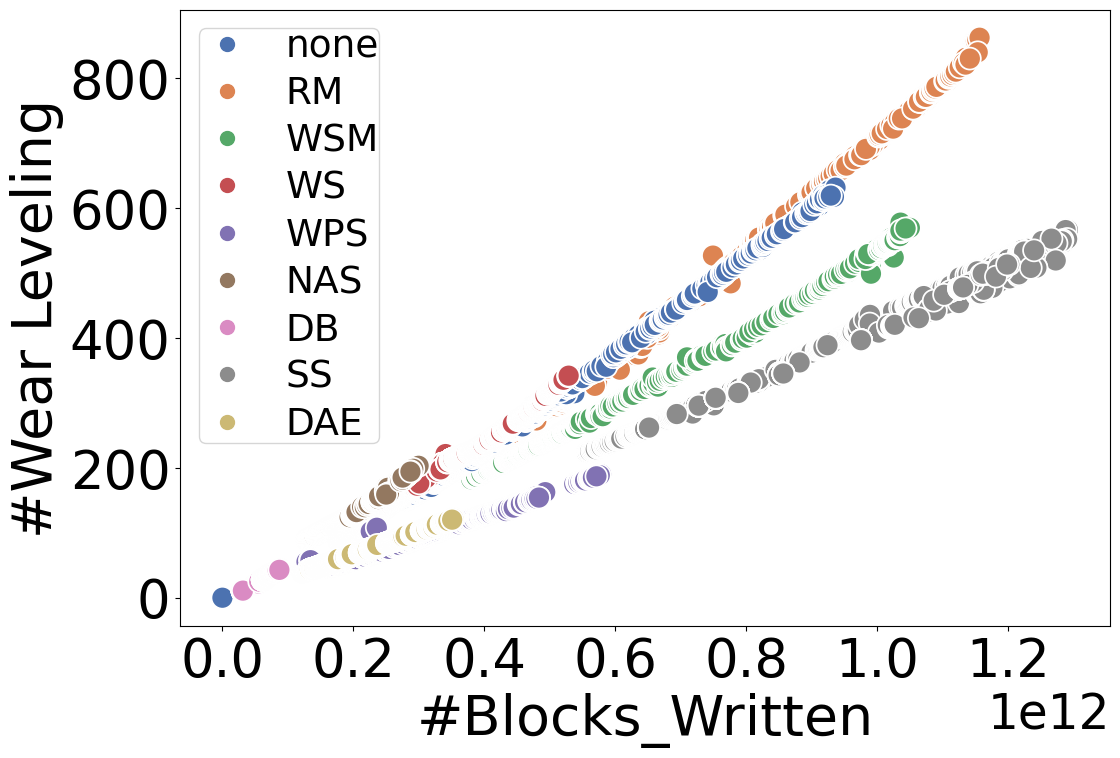

In [14]:
## Analyzes wear leveling (w_r_d) against number of blocks written (n_b_written) through a scatterplot,
## categorizing data by different applications ('app') and customizing plot aesthetics.
## The plot is saved as a PDF for further analysis and reporting.

font_size = 40
label_size = 40

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='w_r_d', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=group, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#Wear Leveling', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()  # Get current axis
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=10, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=27, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

plt.savefig('img/wearlevelingWritenBlocks.pdf', bbox_inches='tight')
plt.show()


N Blocks written x Reallocated sector

In [15]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written', 'r_sectors']].mean()

In [13]:
## Displays a concise summary of the 'group' dataframe including data types and non-null values.

group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   timestamp    6436 non-null   object 
 1   app          6436 non-null   object 
 2   n_b_written  6424 non-null   float64
 3   r_sectors    6424 non-null   float64
dtypes: float64(2), object(2)
memory usage: 201.2+ KB


In [20]:
## Displays the last few rows of the 'group' dataframe.

group.tail()

timestamp   app   n_b_written  r_sectors
6431  2019-12-31    SS  1.198229e+12   8.442826
6432  2019-12-31   WPS  5.710862e+11   8.896552
6433  2019-12-31    WS  5.286785e+11  15.532558
6434  2019-12-31   WSM  1.043207e+12  16.066338
6435  2019-12-31  none  9.290646e+11  10.218057

In [17]:
## Remove outliers that are hindering data visualization

group.drop(group[group.r_sectors > 30].index, inplace=True)

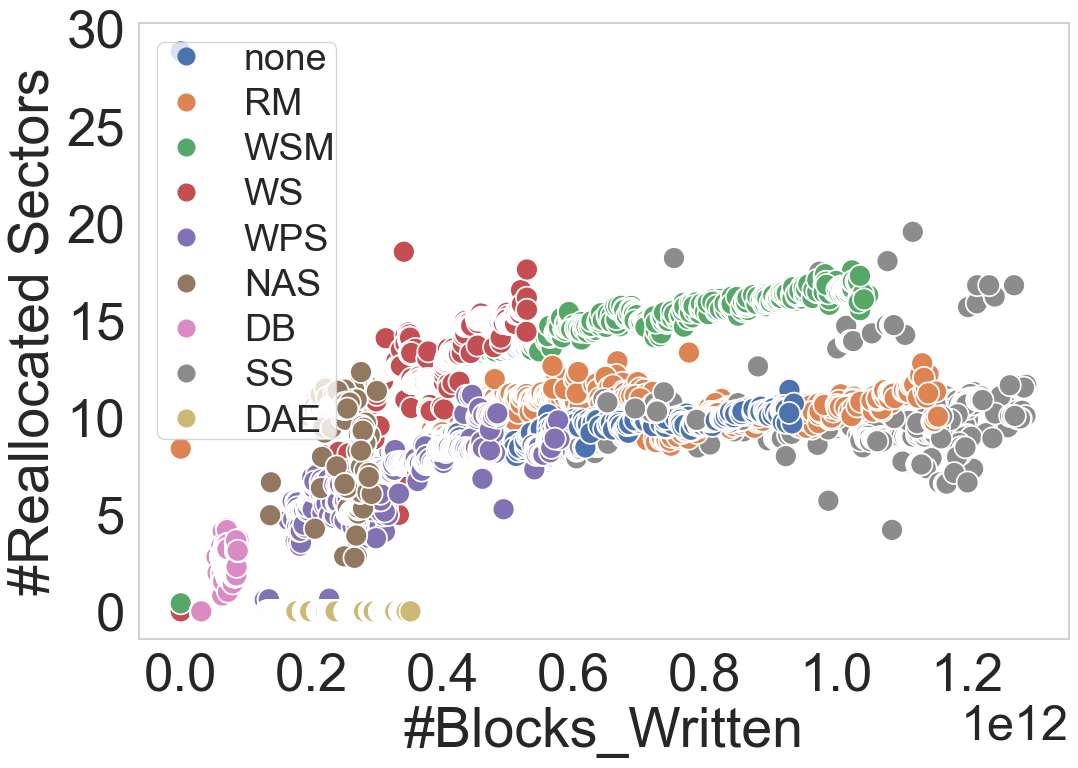

In [936]:
## Analyzes reallocated sectors (#r_sectors) against number of blocks written (#n_b_written) through a scatterplot,
## categorizing data by different applications ('app') and customizing plot aesthetics.
## The plot is saved as a PDF for further analysis and reporting.

font_size = 40
label_size = 40

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='r_sectors', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=group, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#Reallocated Sectors', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()  # Get current axis
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=12, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=27, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

plt.savefig('img/RSWritenBlocks.pdf', bbox_inches='tight')
plt.show()


N Blocks written x SSDs Failures

In [19]:
## Adjust the date format for the dataframe containing SSD failures

resultSSDFailures['date'] = pd.to_datetime(resultSSDFailures['failure_time'], format='%Y-%m-%d %H:%M:%S').dt.floor('D')


In [20]:
## group per day (daily mean)

groupSSDFailures = resultSSDFailures.groupby(['date', 'app'], as_index=False)['disk_id'].count()

In [770]:
# Display a concise summary of the groupSSDFailures dataframe including data types and non-null values

groupSSDFailures.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 460 entries, 0 to 459
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   date     460 non-null    datetime64[ns]
 1   app      460 non-null    object        
 2   disk_id  460 non-null    int64         
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 10.9+ KB


In [21]:
## Calculate the cumulative sum of 'disk_id' for each 'app' and store it in the 'cum_sum' column

groupSSDFailures['cum_sum'] = groupSSDFailures.groupby(['app'])['disk_id'].cumsum()

In [22]:
## Rename the 'date' column to 'timestamp'

groupSSDFailures.rename(columns = {'date':'timestamp'}, inplace=True)

In [23]:
## Using "result" because this is the dataset containing written blocks data
## Convert the 'timestamp' column to datetime format with the specified format and round down to the start of the day

result['timestamp'] = pd.to_datetime(result['timestamp'], format='%Y-%m-%d').dt.floor('D')

In [68]:
## Display a concise summary of the result dataframe including data types and non-null values

result.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31008712 entries, 0 to 31008711
Data columns (total 9 columns):
 #   Column        Dtype         
---  ------        -----         
 0   Unnamed: 0.1  int64         
 1   Unnamed: 0    int64         
 2   disk_id       float64       
 3   timestamp     datetime64[ns]
 4   r_sectors     float64       
 5   n_b_written   float64       
 6   w_r_d         float64       
 7   model_y       object        
 8   app           object        
dtypes: datetime64[ns](1), float64(4), int64(2), object(2)
memory usage: 2.1+ GB


In [24]:
## group per day (daily mean)

group = result.groupby(['timestamp', 'app'], as_index=False)['n_b_written'].mean()

In [25]:
## SMART attributes (r_sector and w_r_d) added to the dataframe for use in future ML model creation
## 'n_b_written' will be used for graphical analysis prior to ML model development

group = result.groupby(['timestamp', 'app'], as_index=False)[['n_b_written','r_sectors','w_r_d']].mean()

In [74]:
## Display a concise summary of the group dataframe including data types and non-null values

group.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6436 entries, 0 to 6435
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
dtypes: datetime64[ns](1), float64(3), object(1)
memory usage: 251.5+ KB


In [26]:
## Merge 'group' and 'groupSSDFailures' dataframes on 'timestamp' and 'app' using a left join


resultWriteFailure = pd.merge(group, groupSSDFailures, on=['timestamp', 'app'], how='left')

In [76]:
## Display a concise summary of the resultWriteFailure dataframe including data types and non-null values

resultWriteFailure.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6436 entries, 0 to 6435
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   timestamp    6436 non-null   datetime64[ns]
 1   app          6436 non-null   object        
 2   n_b_written  6424 non-null   float64       
 3   r_sectors    6424 non-null   float64       
 4   w_r_d        6424 non-null   float64       
 5   disk_id      447 non-null    float64       
 6   cum_sum      447 non-null    float64       
dtypes: datetime64[ns](1), float64(5), object(1)
memory usage: 402.2+ KB


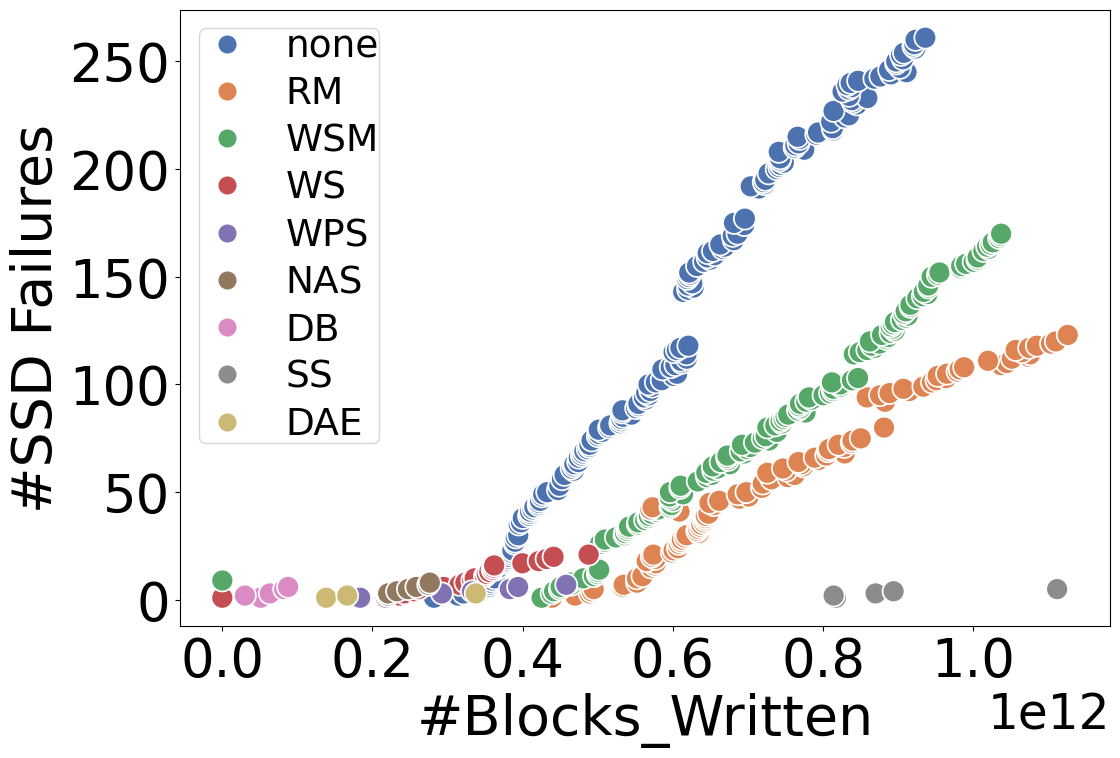

In [27]:
## Analyzes SSD failures against number of blocks written through a scatterplot,
## categorizing data by different applications and customizing plot aesthetics,
## then saves the plot as a PDF for detailed examination and reporting.

# Customize plotting parameters
font_size = 40
label_size = 40

plt.figure(figsize=(12, 8))

# Create the scatterplot
graph = sns.scatterplot(
    x="n_b_written", 
    y='cum_sum', 
    palette='deep', 
    hue='app', 
    hue_order=['none', 'RM', 'WSM', 'WS', 'WPS', 'NAS', 'DB', 'SS', 'DAE'], 
    data=resultWriteFailure, 
    s=250  # Scatter point size
)
plt.grid(False)
plt.ylabel('#SSD Failures', fontsize=label_size)
plt.xlabel('#Blocks_Written', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
#plt.setp(graph.get_xticklabels(), rotation=45)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(22)

# Get unique labels and colors from the scatterplot
handles, labels = graph.get_legend_handles_labels()
unique_labels = []
unique_handles = []
for handle, label in zip(handles, labels):
    if label not in unique_labels:
        unique_labels.append(label)
        unique_handles.append(handle)

# Create custom legend
custom_legends = []
for handle, label in zip(unique_handles, unique_labels):
    if label != '_nolegend_':
        custom_legends.append(mlines.Line2D([], [], color=handle.get_facecolor()[0], marker='o', linestyle='None', markersize=12, label=label))

# Display custom legend
ax.legend(handles=custom_legends, fontsize=27, columnspacing=4, borderpad=0.01, labelspacing=0.3, handlelength=1.5)

ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-5)

# Save the plot
plt.savefig('img/SSDFailuresWritenBlocks.pdf', bbox_inches='tight')
plt.show()


In [28]:
# Filter dataframes by application to prepare for training the Dynamic MTTF machine learning model.

resultWriteFailureNone = resultWriteFailure.loc[resultWriteFailure.app.isin(["none"])] 
resultWriteFailureWSM = resultWriteFailure.loc[resultWriteFailure.app.isin(["WSM"])] 
resultWriteFailureRM = resultWriteFailure.loc[resultWriteFailure.app.isin(["RM"])] 

In [ ]:
## Fill missing values in the 'disk_id' column with 0 for respective application-specific dataframes.

resultWriteFailureNone["disk_id"] = resultWriteFailureNone["disk_id"].fillna(0)
resultWriteFailureWSM["disk_id"] = resultWriteFailureWSM["disk_id"].fillna(0)
resultWriteFailureRM["disk_id"] = resultWriteFailureRM["disk_id"].fillna(0)

In [ ]:
## Calculate cumulative sum of 'disk_id' for each application-specific dataframe.

resultWriteFailureNone['cum_sum'] = resultWriteFailureNone.disk_id.cumsum()
resultWriteFailureWSM['cum_sum'] = resultWriteFailureWSM.disk_id.cumsum()
resultWriteFailureRM['cum_sum'] = resultWriteFailureRM.disk_id.cumsum()

In [32]:
## Display the last 10 rows of the resultWriteFailureNone dataframe.

resultWriteFailureNone.tail(10)

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum
6354 2019-12-22  none  9.225263e+11  10.573636  615.332761      0.0    253.0
6363 2019-12-23  none  9.232198e+11  10.579749  615.986559      2.0    255.0
6372 2019-12-24  none  9.240353e+11  10.438439  616.440009      0.0    255.0
6381 2019-12-25  none  9.221559e+11  10.445325  616.128571      0.0    255.0
6390 2019-12-26  none  9.239867e+11  10.391712  616.414552      0.0    255.0
6399 2019-12-27  none  9.362144e+11  10.698976  631.708087      1.0    256.0
6408 2019-12-28  none  9.194166e+11   9.735392  615.260855      0.0    256.0
6417 2019-12-29  none  9.253141e+11   9.701389  617.181583      0.0    256.0
6426 2019-12-30  none  9.337833e+11   9.679375  617.629916      0.0    256.0
6435 2019-12-31  none  9.290646e+11  10.218057  619.479622      0.0    256.0

In [ ]:
## Calculates dynamic MTTF metrics for SSDs with application 'None'.

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureNone.size

resultWriteFailureNone["AFR_SSDs"] = " "
resultWriteFailureNone["mttf_SDDs"] = " "
resultWriteFailureNone["MTTFMes_SSDs"] = " "
resultWriteFailureNone["MTTFDia_SSDs"] = " "
resultWriteFailureNone["MTTFTest_SSDs"] = " "

for i in range(0, len(resultWriteFailureNone)): 
    

    numberFailedSSDs = resultWriteFailureNone.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(15015-resultWriteFailureNone.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
        MTTFTest_SSDs = ((resultWriteFailureNone.timestamp.iloc[i] - resultWriteFailureNone.timestamp.iloc[1]).days)/numberFailedSSDs
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0
        MTTFTest_SSDs = 0

    # Assigns calculated metrics to respective columns as integers for plotting or further calculations.
    resultWriteFailureNone.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureNone.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureNone.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureNone.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs
    resultWriteFailureNone.MTTFTest_SSDs.iloc[i] = MTTFTest_SSDs

In [ ]:
## Fill missing values with 0 in the resultWriteFailureNone dataframe.

resultWriteFailureNone.fillna(0, inplace=True)

In [49]:
## Display the last 100 rows of the resultWriteFailureNone dataframe.

resultWriteFailureNone.tail(100)

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
5544 2019-09-14  none  8.364111e+11  10.010992  554.223723      0.0    235.0   
5553 2019-09-15  none  8.324314e+11  10.039867  549.618893      1.0    236.0   
5562 2019-09-16  none  8.368280e+11  10.134703  552.678823      1.0    237.0   
5571 2019-09-17  none  8.753159e+11  10.465155  578.749832      0.0    237.0   
5580 2019-09-18  none  8.645079e+11  10.116243  571.376854      0.0    237.0   
...         ...   ...           ...        ...         ...      ...      ...   
6399 2019-12-27  none  9.362144e+11  10.698976  631.708087      1.0    256.0   
6408 2019-12-28  none  9.194166e+11   9.735392  615.260855      0.0    256.0   
6417 2019-12-29  none  9.253141e+11   9.701389  617.181583      0.0    256.0   
6426 2019-12-30  none  9.337833e+11   9.679375  617.629916      0.0    256.0   
6435 2019-12-31  none  9.290646e+11  10.218057  619.479622      0.0    256.0   

      AFR_SSDs       mttf_SDDs MTTFMes_SSDs  MTTFDia_SSDs MTTFTest_SSDs  
5544  0.009232   948855.035461  1299.801418  39535.626478      2.638298  
5553  0.009257   946358.389831  1296.381356  39431.599576      2.631356  
5562  0.009281   943818.950774  1292.902672  39325.789616      2.624473  
5571  0.009267   945272.379747  1294.893671  39386.349156      2.628692  
5580  0.009252   946789.670886  1296.972152   39449.56962      2.632911  
...        ...             ...          ...           ...           ...  
6399  0.008624     1015749.375    1391.4375  42322.890625      2.828125  
6408  0.008613   1017083.43099  1393.264974  42378.476291      2.832031  
6417  0.008601  1018486.304687  1395.186719  42436.929362      2.835938  
6426  0.008589  1019889.178385  1397.108464  42495.382433      2.839844  
6435  0.008577  1021292.052083  1399.030208  42553.835503       2.84375  

[100 rows x 12 columns]

In [51]:
## Display the first few rows of the resultWriteFailureNone dataframe.

resultWriteFailureNone.head()

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
2  2018-01-01  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
11 2018-01-02  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
20 2018-01-03  none  2.812087e+11   7.884492  150.180418      0.0      0.0   
29 2018-01-04  none  2.816459e+11   7.886817  150.485215      0.0      0.0   
38 2018-01-05  none  2.819011e+11   7.897597  150.971222      1.0      1.0   

    AFR_SSDs  mttf_SDDs MTTFMes_SSDs MTTFDia_SSDs MTTFTest_SSDs  
2          0          0            0            0             0  
11         0          0            0            0             0  
20         0          0            0            0             0  
29         0          0            0            0             0  
38  0.007992  1096095.0       1501.5    45670.625           3.0

In [56]:
# Save the resultWriteFailureNone dataframe to a CSV file.

resultWriteFailureNone.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')

In [44]:
## In case should necessary drop out some values (e.g., outliers)

resultWriteFailureNone.drop(resultWriteFailureNone[resultWriteFailureNone.n_b_written > (4.5*(10**11))].index, inplace=True)

In [45]:
## Display a concise summary of the resultWriteFailureNone dataframe including data types and non-null values.

resultWriteFailureNone.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198 entries, 0 to 197
Data columns (total 13 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     198 non-null    int64  
 1   timestamp      198 non-null    object 
 2   app            198 non-null    object 
 3   n_b_written    198 non-null    float64
 4   r_sectors      198 non-null    float64
 5   w_r_d          198 non-null    float64
 6   disk_id        198 non-null    float64
 7   cum_sum        198 non-null    float64
 8   AFR_SSDs       198 non-null    float64
 9   mttf_SDDs      198 non-null    float64
 10  MTTFMes_SSDs   198 non-null    float64
 11  MTTFDia_SSDs   198 non-null    float64
 12  MTTFTest_SSDs  198 non-null    float64
dtypes: float64(10), int64(1), object(2)
memory usage: 20.2+ KB


In [ ]:
## Calculates dynamic MTTF metrics for SSDs with application 'RM'.

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureRM.size

resultWriteFailureRM["AFR_SSDs"] = " "
resultWriteFailureRM["mttf_SDDs"] = " "
resultWriteFailureRM["MTTFMes_SSDs"] = " "
resultWriteFailureRM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureRM)): 
    

    numberFailedSSDs = resultWriteFailureRM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureRM.timestamp.iloc[i] - resultWriteFailureRM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(8015-resultWriteFailureRM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    # Assigns calculated metrics to respective columns as integers for plotting or further calculations.
    resultWriteFailureRM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureRM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureRM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureRM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

In [115]:
## Display the first few rows of the resultWriteFailureRM dataframe.

resultWriteFailureRM.head()

timestamp app   n_b_written  disk_id  cum_sum AFR_SSDs mttf_SDDs  \
0  2018-01-01  RM           NaN      0.0      0.0        0         0   
6  2018-01-02  RM           NaN      0.0      0.0        0         0   
15 2018-01-03  RM  3.824297e+11      0.0      0.0        0         0   
24 2018-01-04  RM  3.838148e+11      0.0      0.0        0         0   
33 2018-01-05  RM  3.856599e+11      0.0      0.0        0         0   

   MTTFMes_SSDs MTTFDia_SSDs  
0             0            0  
6             0            0  
15            0            0  
24            0            0  
33            0            0

In [ ]:
## Fill missing values with 0 in the resultWriteFailureRM dataframe.

resultWriteFailureRM.fillna(0, inplace=True)

In [67]:
## Save the resultWriteFailureRM dataframe to a CSV file.

resultWriteFailureRM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')

In [ ]:
## In case should necessary drop out some values (e.g., outliers)

resultWriteFailureRM.drop(resultWriteFailureRM[resultWriteFailureRM.n_b_written > (4.5*(10**11))].index, inplace=True)

In [ ]:
## Calculates dynamic MTTF metrics for SSDs with application 'WSM'.

hours_per_year = 365*24
numberTotalSSDs = resultWriteFailureWSM.size

resultWriteFailureWSM["AFR_SSDs"] = " "
resultWriteFailureWSM["mttf_SDDs"] = " "
resultWriteFailureWSM["MTTFMes_SSDs"] = " "
resultWriteFailureWSM["MTTFDia_SSDs"] = " "

for i in range(0, len(resultWriteFailureWSM)): 
    

    numberFailedSSDs = resultWriteFailureWSM.iloc[i].cum_sum
    if numberFailedSSDs != 0:
        temp = ((resultWriteFailureWSM.timestamp.iloc[i] - resultWriteFailureWSM.timestamp.iloc[1]).days)/30
        AFR_SSDs = ((numberFailedSSDs/(18036-resultWriteFailureWSM.cum_sum.iloc[i-1]))*(12/temp))
        MTTF_SSDs = (hours_per_year)/(AFR_SSDs)
        MTTFMes_SSDs = (12)/(AFR_SSDs)
        MTTFDia_SSDs = (365)/(AFR_SSDs)
    else: 
        AFR_SSDs = 0
        MTTF_SSDs = 0
        MTTFMes_SSDs = 0
        MTTFDia_SSDs = 0

    # Assigns calculated metrics to respective columns as integers for plotting or further calculations.
    resultWriteFailureWSM.AFR_SSDs.iloc[i] = AFR_SSDs
    resultWriteFailureWSM.mttf_SDDs.iloc[i] = MTTF_SSDs
    resultWriteFailureWSM.MTTFMes_SSDs.iloc[i] = MTTFMes_SSDs
    resultWriteFailureWSM.MTTFDia_SSDs.iloc[i] = MTTFDia_SSDs

In [ ]:
## Fill missing values with 0 in the resultWriteFailureWSM dataframe.

resultWriteFailureWSM.fillna(0, inplace=True)

In [66]:
## Save the resultWriteFailureWSM dataframe to a CSV file.

resultWriteFailureWSM.to_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

In [89]:
## In case should necessary drop out some values (e.g., outliers)

resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written > (0.45*(10**12))].index, inplace=True)
resultWriteFailureWSM.drop(resultWriteFailureWSM[resultWriteFailureWSM.n_b_written < (0.42*(10**12))].index, inplace=True)

In [21]:
## Load data from CSV files into respective pandas dataframes.
## Loading extracted metrics datasets for training the models independently

resultWriteFailureNone = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'None' + '.csv')
resultWriteFailureRM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'RM' + '.csv')
resultWriteFailureWSM = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + 'WSM' + '.csv')

In [83]:
## Display the first few rows of the resultWriteFailureNone dataframe.

resultWriteFailureNone.head()

timestamp   app   n_b_written  r_sectors       w_r_d  disk_id  cum_sum  \
2  2018-01-01  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
11 2018-01-02  none  0.000000e+00   0.000000    0.000000      0.0      0.0   
20 2018-01-03  none  2.812087e+11   7.884492  150.180418      0.0      0.0   
29 2018-01-04  none  2.816459e+11   7.886817  150.485215      0.0      0.0   
38 2018-01-05  none  2.819011e+11   7.897597  150.971222      1.0      1.0   

    AFR_SSDs  mttf_SDDs MTTFMes_SSDs MTTFDia_SSDs MTTFTest_SSDs  
2          0          0            0            0             0  
11         0          0            0            0             0  
20         0          0            0            0             0  
29         0          0            0            0             0  
38  0.007992  1096095.0       1501.5    45670.625           3.0

Epoch 1/10
16/16 - 1s - loss: 0.0694 - val_loss: 0.0045 - 783ms/epoch - 49ms/step
Epoch 2/10
16/16 - 0s - loss: 0.0017 - val_loss: 1.3940e-04 - 28ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 6.6642e-05 - val_loss: 3.0560e-05 - 28ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 1.7196e-05 - val_loss: 6.8947e-06 - 27ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 7.6323e-06 - val_loss: 6.9168e-06 - 29ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 5.2612e-06 - val_loss: 3.9529e-06 - 26ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 2.9777e-06 - val_loss: 1.8738e-06 - 25ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 1.4808e-06 - val_loss: 1.3832e-06 - 25ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 1.4133e-06 - val_loss: 2.2482e-06 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 1.7368e-06 - val_loss: 1.9059e-06 - 26ms/epoch - 2ms/step
4/4 [==============================] - 0s 774us/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_scores

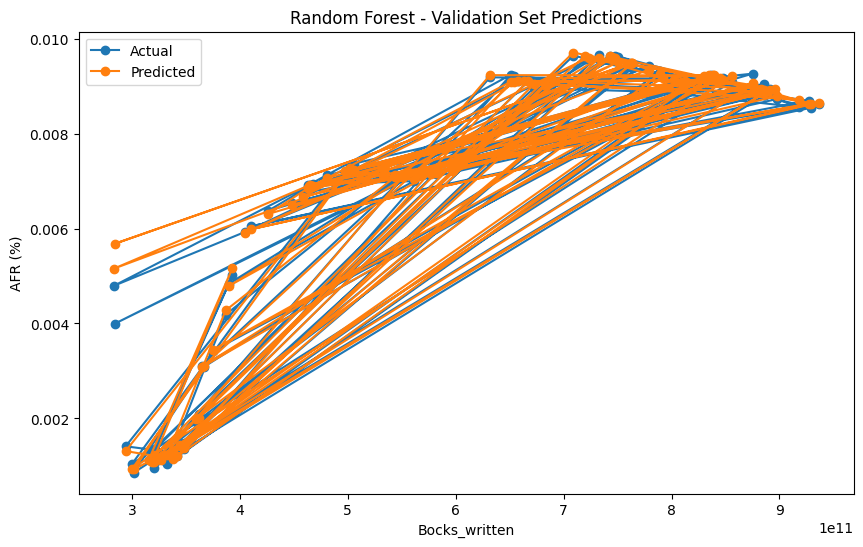

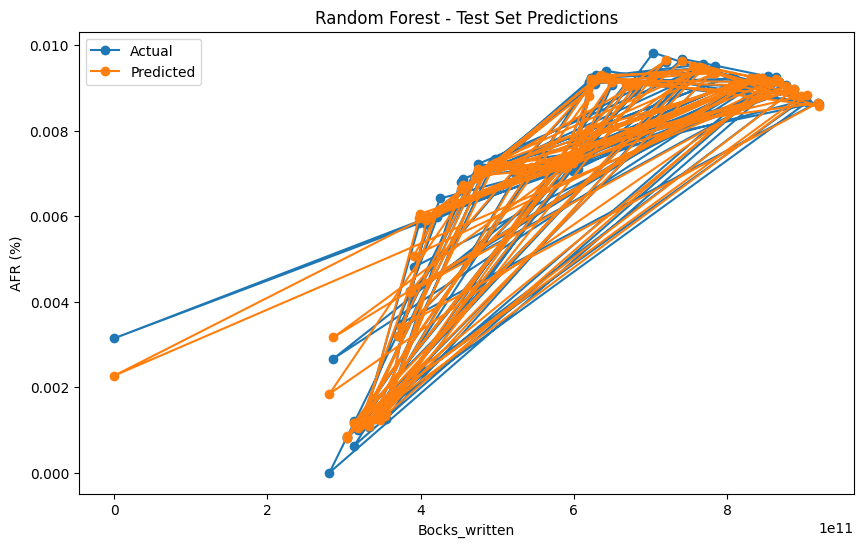

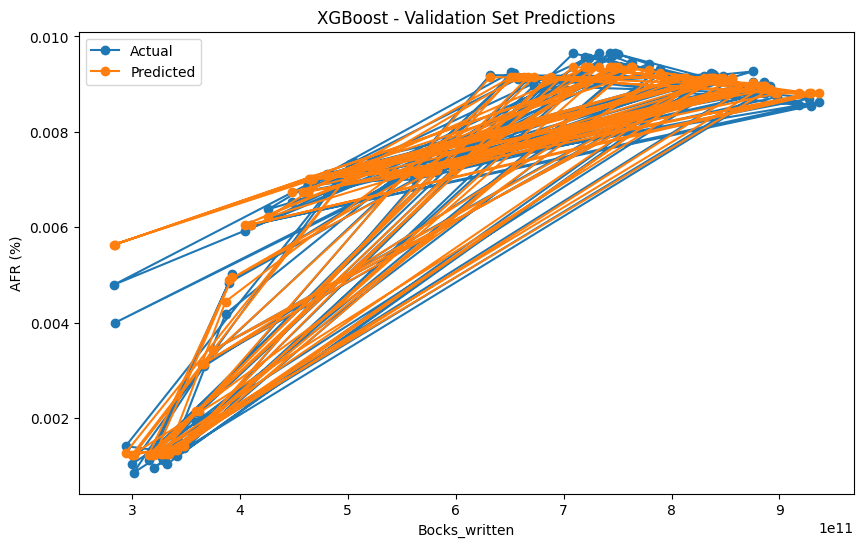

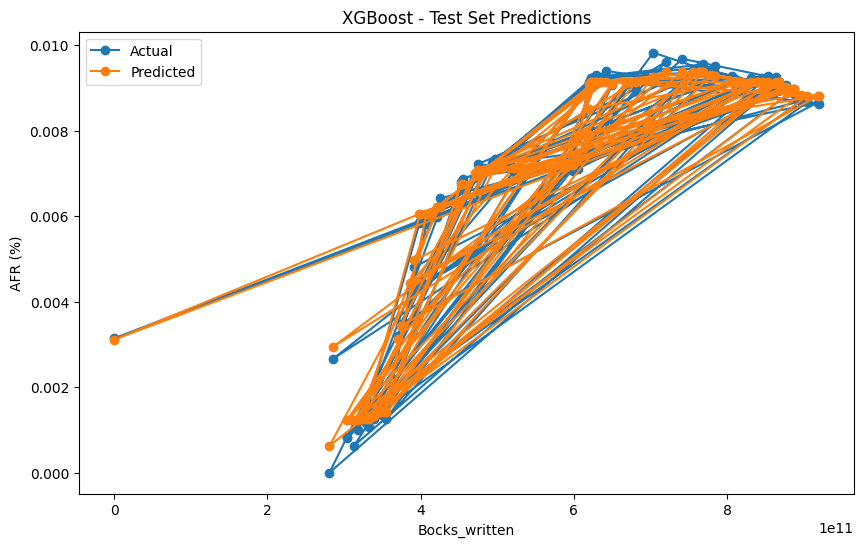

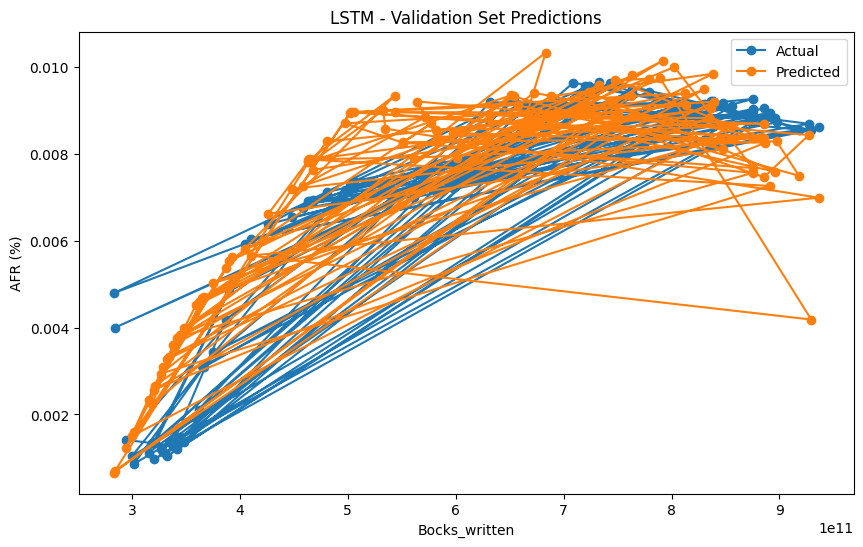

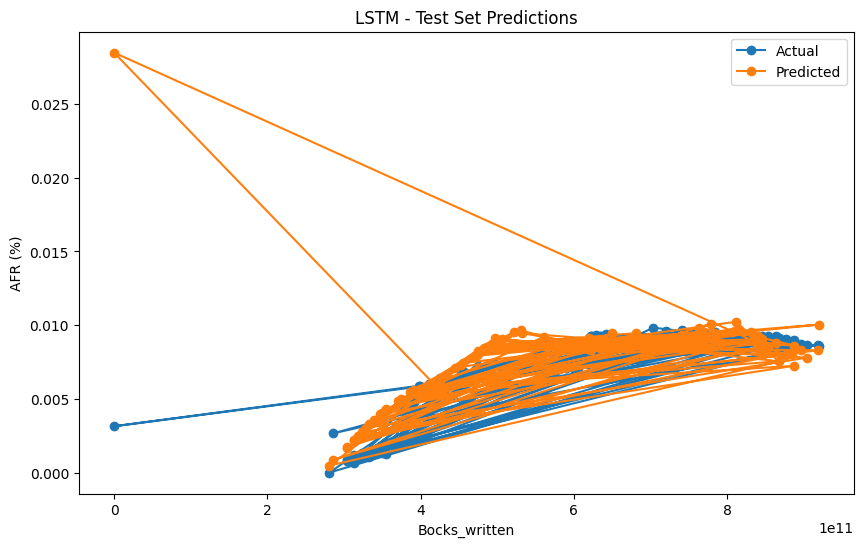

Random Forest Equation:
n_b_written * 0.3845 + r_sectors * 0.0066 + w_r_d * 0.6090 + 
XGBoost Equation:
n_b_written * 0.3946 + r_sectors * 0.0913 + w_r_d * 0.5141 + 
LSTM Model Summary:
Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_5 (LSTM)               (None, 50)                10400     
                                                                 
 dense_5 (Dense)             (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [8]:
## Machine learning model training, tuning, and validation for dynamic ssd failure prediction
## Application: None

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureNone

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersNone.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


Epoch 1/10
16/16 - 1s - loss: 0.0595 - val_loss: 4.5896e-04 - 844ms/epoch - 53ms/step
Epoch 2/10
16/16 - 0s - loss: 8.6718e-04 - val_loss: 5.7570e-04 - 31ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 2.9048e-04 - val_loss: 4.7218e-05 - 27ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 4.0012e-05 - val_loss: 3.8677e-05 - 26ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 1.4854e-05 - val_loss: 1.1095e-05 - 26ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 7.3690e-06 - val_loss: 7.4379e-06 - 26ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 6.1626e-06 - val_loss: 6.8484e-06 - 24ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 4.8612e-06 - val_loss: 3.3635e-06 - 26ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 2.1181e-06 - val_loss: 1.1492e-06 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 1.3789e-06 - val_loss: 1.0617e-06 - 27ms/epoch - 2ms/step
4/4 [==============================] - 0s 1ms/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_

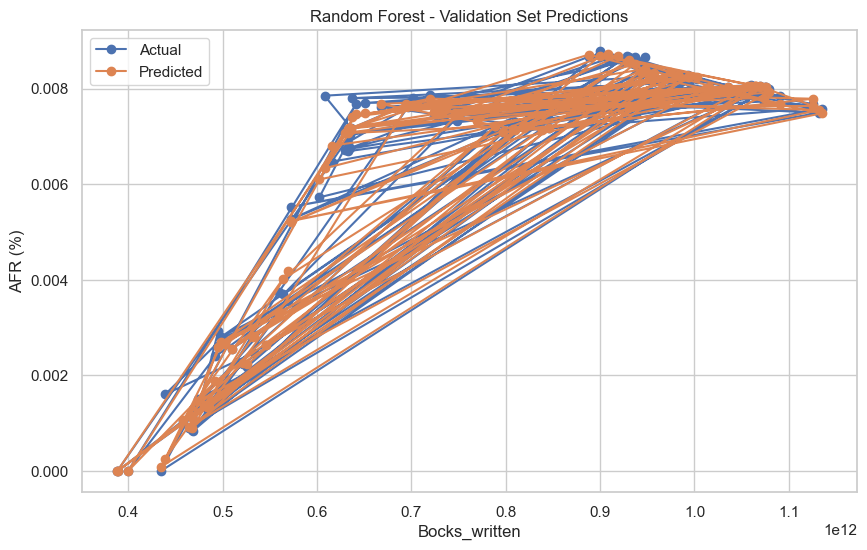

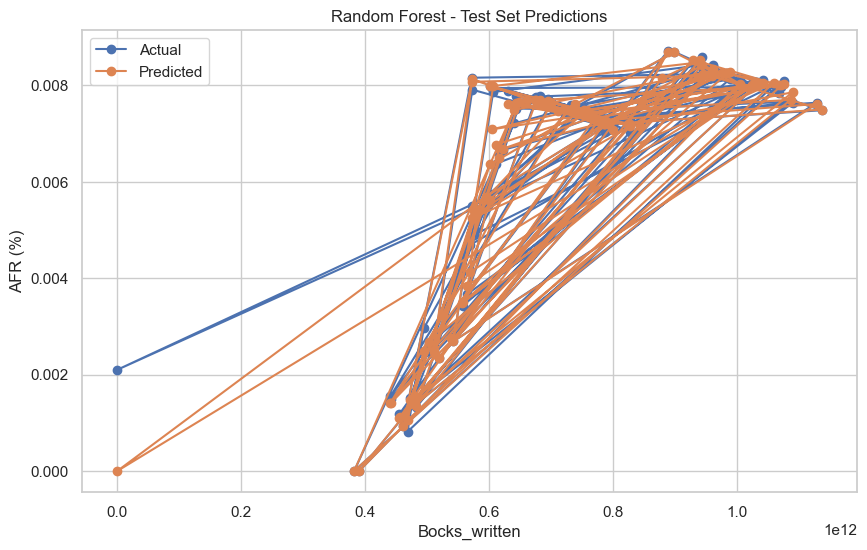

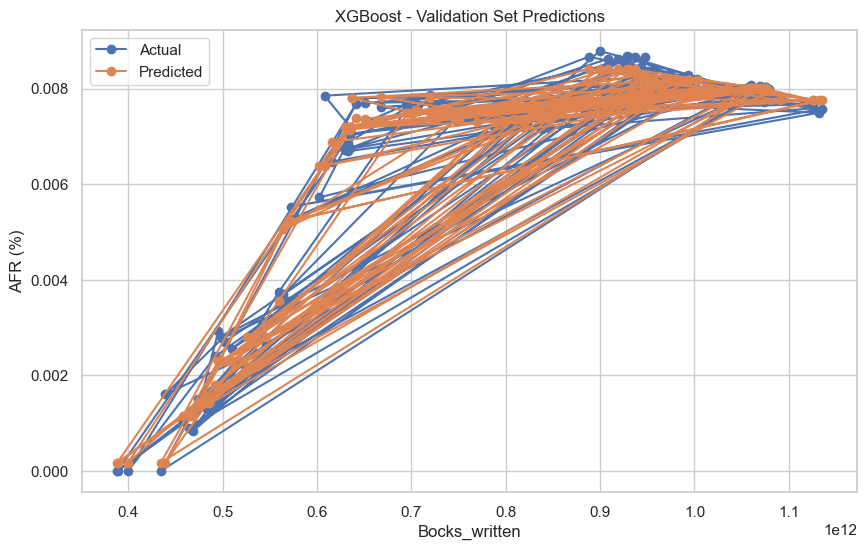

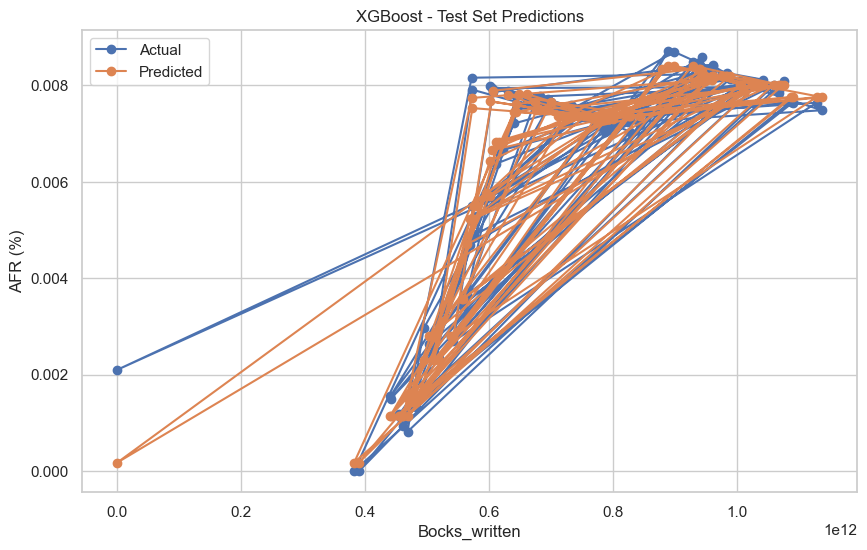

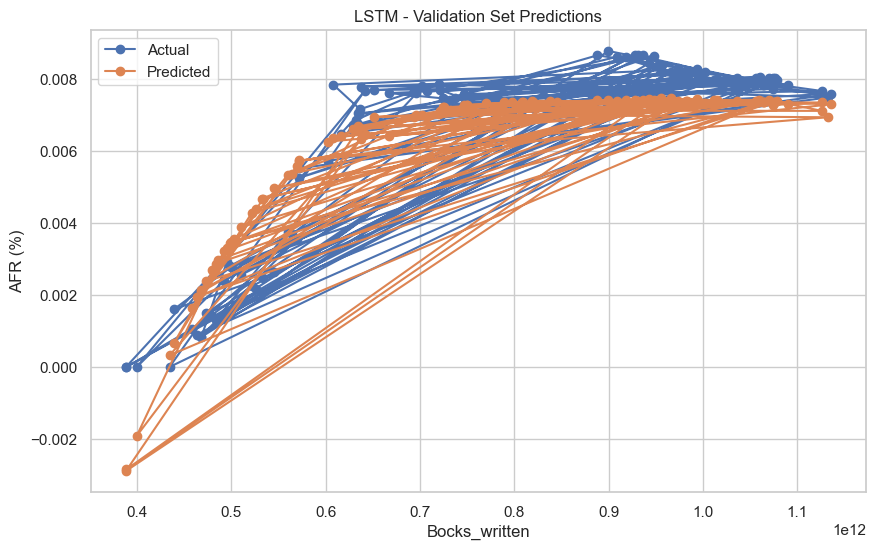

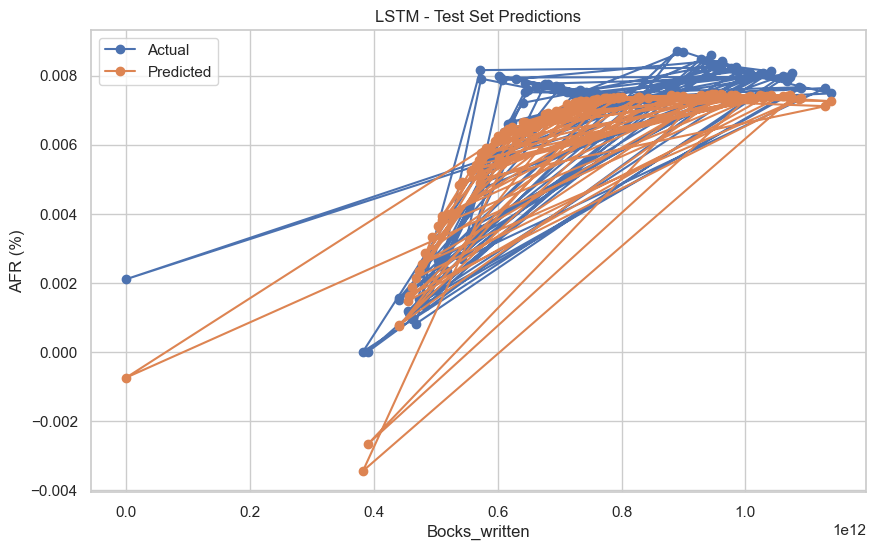

Random Forest Equation:
n_b_written * 0.9252 + r_sectors * 0.0179 + w_r_d * 0.0569 + 
XGBoost Equation:
n_b_written * 0.8796 + r_sectors * 0.0760 + w_r_d * 0.0444 + 
LSTM Model Summary:
Model: "sequential_33"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_33 (LSTM)              (None, 50)                10400     
                                                                 
 dense_33 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [236]:
## Machine learning model training, tuning, and validation for dynamic ssd failure prediction
## Application: RM

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureRM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersRM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


Epoch 1/10
16/16 - 1s - loss: 0.0108 - val_loss: 0.0028 - 899ms/epoch - 56ms/step
Epoch 2/10
16/16 - 0s - loss: 5.2753e-04 - val_loss: 5.2249e-05 - 26ms/epoch - 2ms/step
Epoch 3/10
16/16 - 0s - loss: 5.1374e-05 - val_loss: 8.6456e-06 - 28ms/epoch - 2ms/step
Epoch 4/10
16/16 - 0s - loss: 6.7088e-06 - val_loss: 4.6001e-06 - 27ms/epoch - 2ms/step
Epoch 5/10
16/16 - 0s - loss: 4.6357e-06 - val_loss: 1.8960e-06 - 26ms/epoch - 2ms/step
Epoch 6/10
16/16 - 0s - loss: 1.5749e-06 - val_loss: 5.9552e-07 - 27ms/epoch - 2ms/step
Epoch 7/10
16/16 - 0s - loss: 9.2578e-07 - val_loss: 3.7137e-06 - 25ms/epoch - 2ms/step
Epoch 8/10
16/16 - 0s - loss: 1.6630e-06 - val_loss: 2.1879e-06 - 26ms/epoch - 2ms/step
Epoch 9/10
16/16 - 0s - loss: 8.2668e-07 - val_loss: 7.1475e-07 - 25ms/epoch - 2ms/step
Epoch 10/10
16/16 - 0s - loss: 6.1278e-07 - val_loss: 2.0315e-07 - 25ms/epoch - 2ms/step
4/4 [==============================] - 0s 987us/step
Length of models array: 3
Length of mae_scores array: 6
Length of mse_sc

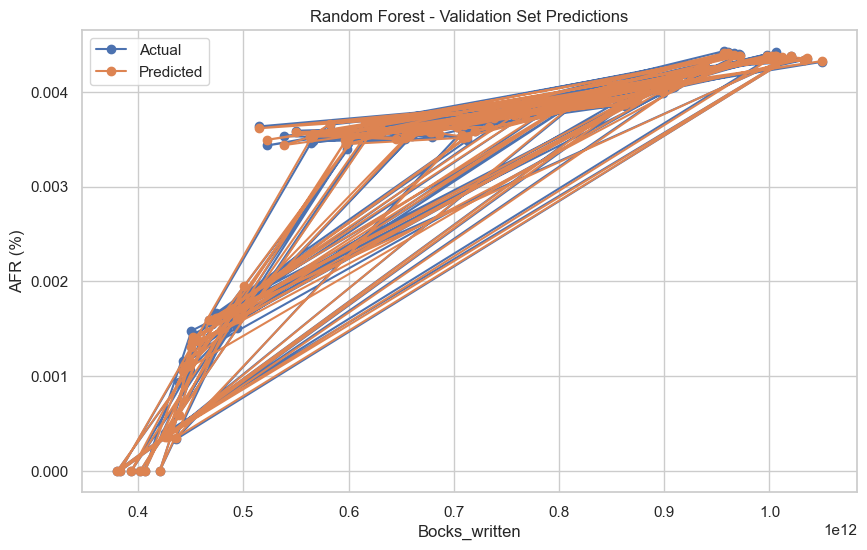

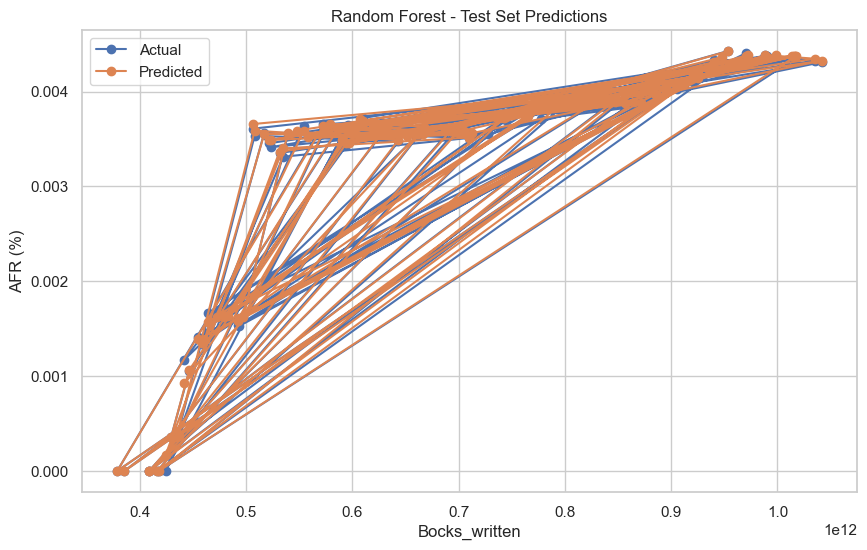

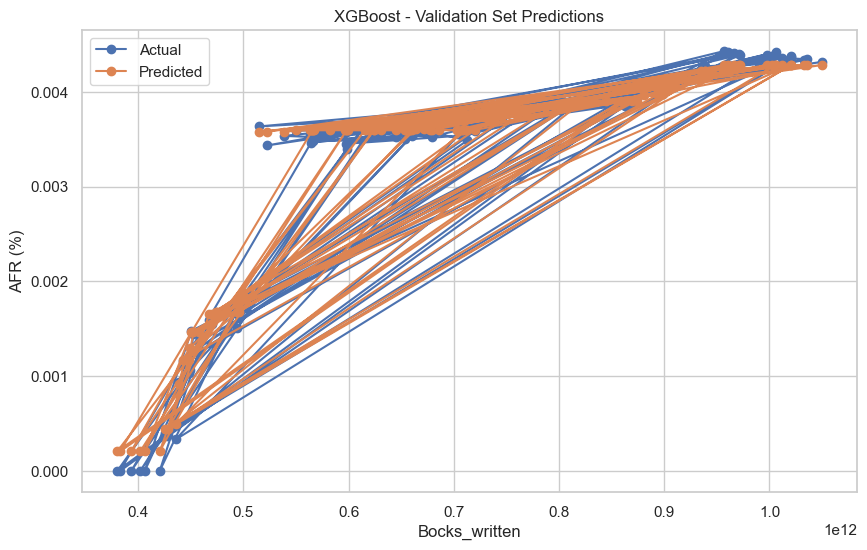

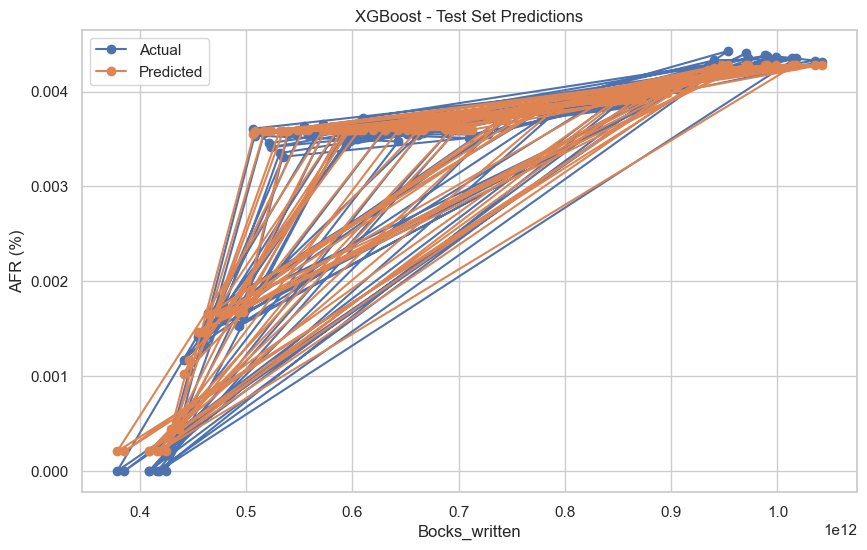

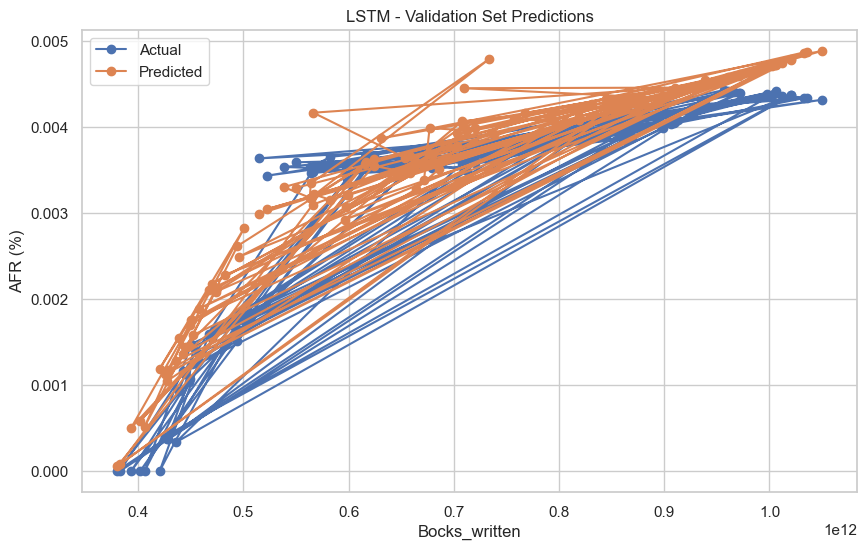

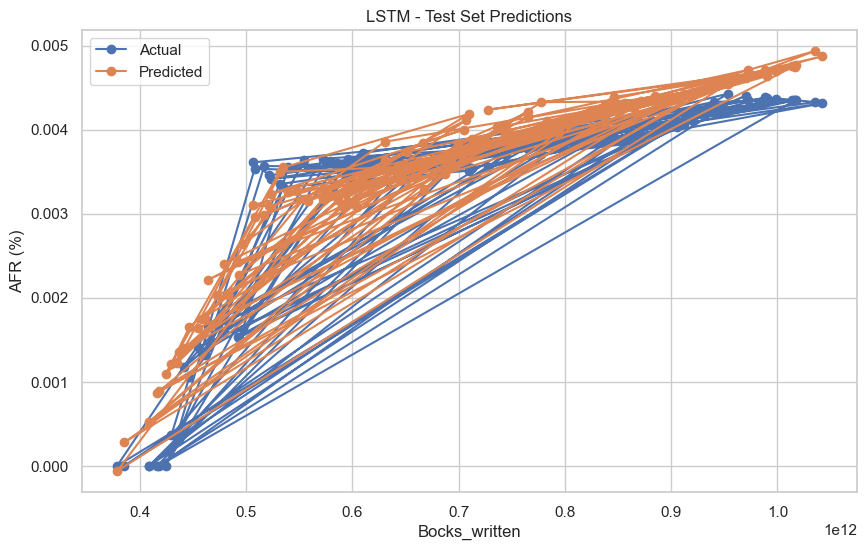

Random Forest Equation:
n_b_written * 0.6094 + r_sectors * 0.0056 + w_r_d * 0.3850 + 
XGBoost Equation:
n_b_written * 0.5668 + r_sectors * 0.2224 + w_r_d * 0.2109 + 
LSTM Model Summary:
Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_16 (LSTM)              (None, 50)                10400     
                                                                 
 dense_16 (Dense)            (None, 1)                 51        
                                                                 
Total params: 10451 (40.82 KB)
Trainable params: 10451 (40.82 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [219]:
## Machine learning model training, tuning, and validation for dynamic ssd failure prediction
## Application: WSM

# Load your dataset
# Assuming your dataset is stored in a DataFrame named 'df'
# with columns: 'AFR_SSDs', 'n_b_written', 'r_sectors', 'w_r_d'
df = resultWriteFailureWSM

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Random Forest hyperparameter tuning
rf_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
}

rf_model = RandomForestRegressor()
rf_grid = GridSearchCV(rf_model, rf_param_grid, cv=3, scoring='neg_mean_absolute_error')
rf_grid.fit(X_train, y_train)

# Get the best Random Forest model
best_rf_model = rf_grid.best_estimator_

# XGBoost hyperparameter tuning
xgb_param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [3, 6, 9],
    'learning_rate': [0.01, 0.1, 0.2],
}

xgb_model = XGBRegressor()
xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='neg_mean_absolute_error')
xgb_grid.fit(X_train, y_train)

# Get the best XGBoost model
best_xgb_model = xgb_grid.best_estimator_

# LSTM hyperparameter tuning (simple learning rate adjustment)
lstm_learning_rate = 0.01

# Reshape input data for LSTM
X_train_lstm = np.reshape(X_train.values, (X_train.shape[0], X_train.shape[1], 1)).astype('float32')
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')
X_test_lstm = np.reshape(X_test.values, (X_test.shape[0], X_test.shape[1], 1)).astype('float32')

y_train = y_train.astype('float32')
y_val = y_val.astype('float32')

lstm_model = Sequential()
lstm_model.add(LSTM(units=50, input_shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
lstm_model.add(Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=Adam(learning_rate=lstm_learning_rate))
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=32, validation_data=(X_val_lstm, y_val), verbose=2)

# Make predictions for the best LSTM model
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

# Evaluate best models
models = ['Random Forest', 'XGBoost', 'LSTM']
mae_scores = []
mse_scores = []
r2_scores = []  # Added for R-squared

# Append validation scores
best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds],
    [y_val, y_val, y_val]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Append test scores
best_rf_test_preds = best_rf_model.predict(X_test)
best_xgb_test_preds = best_xgb_model.predict(X_test)
best_lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()

for preds, true_vals in zip(
    [best_rf_test_preds, best_xgb_test_preds, best_lstm_test_preds],
    [y_test, y_test, y_test]  # Ensure that the true_vals list corresponds to the models
):
    mae_scores.append(mean_absolute_error(true_vals, preds))
    mse_scores.append(mean_squared_error(true_vals, preds))
    r2_scores.append(r2_score(true_vals, preds))  # Calculate R-squared

# Print lengths of arrays for debugging
print("Length of models array:", len(models))
print("Length of mae_scores array:", len(mae_scores))
print("Length of mse_scores array:", len(mse_scores))
print("Length of r2_scores array:", len(r2_scores))

# Ensure all arrays have the same length
assert len(models) * 2 == len(mae_scores) == len(mse_scores) == len(r2_scores), "Length mismatch in arrays"

# Save results to a CSV file with hyperparameters
results_list = []
for model, mae, mse, r2 in zip(models * 3, mae_scores, mse_scores, r2_scores):
    results_list.append({'Model': model, 'Metric': 'MAE', 'Score': mae})
    results_list.append({'Model': model, 'Metric': 'MSE', 'Score': mse})
    results_list.append({'Model': model, 'Metric': 'R-squared', 'Score': r2})

# Add hyperparameters to the CSV
results_list.append({'Model': 'Random Forest', 'Metric': 'Best Parameters', 'Score': best_rf_model.get_params()})
results_list.append({'Model': 'XGBoost', 'Metric': 'Best Parameters', 'Score': best_xgb_model.get_params()})
results_list.append({'Model': 'LSTM', 'Metric': 'Best Parameters', 'Score': {'Learning Rate': lstm_learning_rate}})

results_df = pd.DataFrame(results_list)
results_df.to_csv('MLEvaluation/model_Evaluation_Results_with_HyperparametersWSM.csv', index=False)

# Plotting Validation and test per model
def plot_predictions(X_data, y_true, y_pred, set_type, model_name):
    plt.figure(figsize=(10, 6))
    # Use one of the features as X label
    x_label = X_data.iloc[:, 0]  # Assuming the first feature is used
    plt.plot(x_label, y_true, label='Actual', marker='o')
    plt.plot(x_label, y_pred, label='Predicted', marker='o')
    plt.title(f"{model_name} - {set_type} Set Predictions")
    plt.xlabel('Bocks_written')  # Replace with the actual feature name
    plt.ylabel('AFR (%)')
    plt.legend()
    plt.show()

# Plotting Validation and test per model by using best parameter results
plot_predictions(X_val, y_val, best_rf_val_preds, 'Validation', 'Random Forest')
plot_predictions(X_test, y_test, best_rf_test_preds, 'Test', 'Random Forest')

plot_predictions(X_val, y_val, best_xgb_val_preds, 'Validation', 'XGBoost')
plot_predictions(X_test, y_test, best_xgb_test_preds, 'Test', 'XGBoost')

plot_predictions(X_val, y_val, best_lstm_val_preds, 'Validation', 'LSTM')
plot_predictions(X_test, y_test, best_lstm_test_preds, 'Test', 'LSTM')

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Print summary for LSTM
print("\nLSTM Model Summary:")
lstm_model.summary()


In [ ]:
## Saving machine learning models for later use (application: {appName})

import joblib

appName = 'WSM'

# Assuming you have trained models named best_rf_model, best_xgb_model, and lstm_model

# Save Random Forest model
joblib.dump(best_rf_model, 'MLModels/best_rf_model' + appName + '.joblib')

# Save XGBoost model
joblib.dump(best_xgb_model, 'MLModels/best_xgb_model' + appName + '.joblib')

# Save LSTM model
lstm_model.save('MLModels/lstm_model' + appName + '.h5')  # Assuming lstm_model is a Keras model


In [ ]:
## Loading machine learning models per application: {appName}

import joblib

appName = 'RM'

# Loading the respective app dataset to create variables so that will possible to work with the ML model from here on.
df = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + appName + '.csv')

# Data preprocessing
X = df[['n_b_written', 'r_sectors', 'w_r_d']]
y = df['AFR_SSDs']

# Split the data into training, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')

# Load Random Forest model
best_rf_model = joblib.load('MLModels/best_rf_model' + appName + 'Backup.joblib')

# Load XGBoost model
best_xgb_model = joblib.load('MLModels/best_xgb_model' + appName + 'Backup.joblib')

# Load LSTM model
from keras.models import load_model
lstm_model = load_model('MLModels/lstm_model' + appName + 'Backup.h5')

In [ ]:
## Loading machine learning models for all applications

import joblib
from keras.models import load_model

# List of app names
app_names = ['None', 'RM', 'WSM']

# Dictionary to store models
models = {}

for appName in app_names:
    # Loading the respective app dataset
    df = pd.read_csv('DatasetML/' + 'extractedFeaturesMLTraining' + appName + '.csv')

    # Data preprocessing
    X = df[['n_b_written', 'r_sectors', 'w_r_d']]
    y = df['AFR_SSDs']

    # Split the data into training, validation, and test sets
    X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
    X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)
    X_val_lstm = np.reshape(X_val.values, (X_val.shape[0], X_val.shape[1], 1)).astype('float32')

    # Load Random Forest model
    best_rf_model = joblib.load('MLModels/best_rf_model' + appName + 'Backup.joblib')
    models['best_rf_model_' + appName] = best_rf_model

    # Load XGBoost model
    best_xgb_model = joblib.load('MLModels/best_xgb_model' + appName + 'Backup.joblib')
    models['best_xgb_model_' + appName] = best_xgb_model

    # Load LSTM model
    lstm_model = load_model('MLModels/lstm_model' + appName + 'Backup.h5')
    models['lstm_model_' + appName] = lstm_model


In [396]:
## Display feature importances and equations for Random Forest and XGBoost models

# Get feature importances for Random Forest
rf_feature_importances = best_rf_model.feature_importances_

# Print equation for Random Forest
print("Random Forest Equation:")
for feature, importance in zip(X.columns, rf_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")

# Get feature importances for XGBoost
xgb_feature_importances = best_xgb_model.feature_importances_

# Print equation for XGBoost
print("\nXGBoost Equation:")
for feature, importance in zip(X.columns, xgb_feature_importances):
    print(f"{feature} * {importance:.4f} + ", end="")


Random Forest Equation:
n_b_written * 0.4762 + r_sectors * 0.0071 + w_r_d * 0.5167 + 
XGBoost Equation:
n_b_written * 0.5668 + r_sectors * 0.2224 + w_r_d * 0.2109 + 

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1367621094.py:22: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=custom_labels, y=rf_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


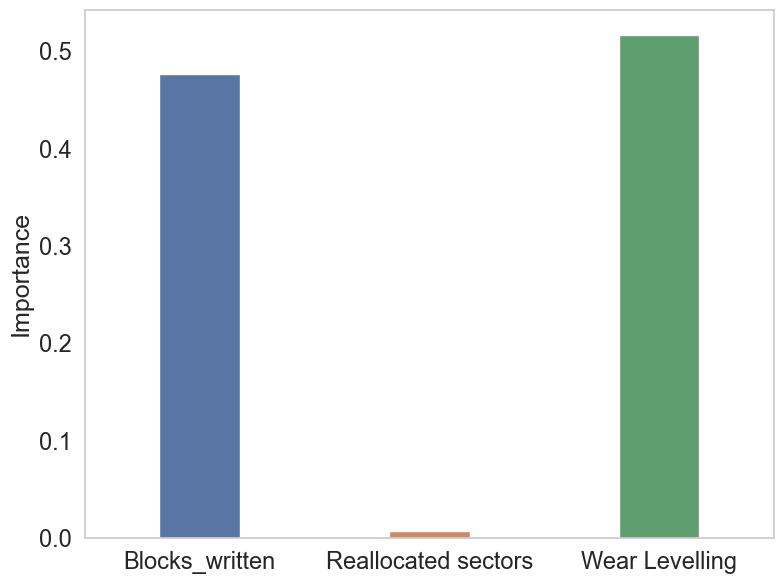

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1367621094.py:34: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x=custom_labels, y=xgb_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


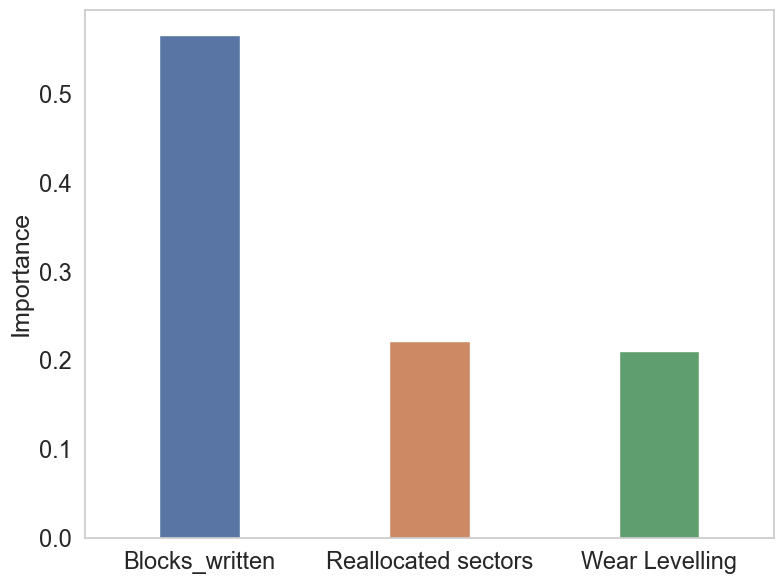

In [397]:
## Plotting feature importances for Random Forest and XGBoost models for one single application

# Customize plotting parameters
font_size = 17  # Adjust font size as needed
title_size = 18  # Adjust title font size as needed
label_size = 18  # Adjust label font size as needed

# Define custom labels for the x-axis
custom_labels = ['Blocks_written', 'Reallocated sectors', 'Wear Levelling']  # Replace with your desired labels

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.35  # Adjust the width as needed

# Plot feature importances for Random Forest
plt.figure(figsize=(8, 6))
sns.barplot(x=custom_labels, y=rf_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
plt.ylabel('Importance', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.grid(False)
# Save the figure in PDF format
plt.savefig('img/MLEvaluationFeatureImportanceRandomForest' + appName + '.pdf')
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(8, 6))
sns.barplot(x=custom_labels, y=xgb_feature_importances, palette="deep", ci=None, width=bar_width)  # Adjust width and color
plt.ylabel('Importance', fontsize=label_size)
plt.xticks(fontsize=font_size)
plt.yticks(fontsize=font_size)
plt.grid(False)
plt.tight_layout()  # Adjust layout to prevent clipping
# Save the figure in PDF format
plt.savefig('img/MLEvaluationFeatureImportanceXGBoost' + appName + '.pdf')
plt.show()


/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:33: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  rf_feature_importances = pd.concat([rf_feature_importances, app_feature_importances], ignore_index=True)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:45: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  xgb_feature_importances = pd.concat([xgb_feature_importances, app_feature_importances], ignore_index=True)
/var/folders/62/6b4lt5yn51jggw8l

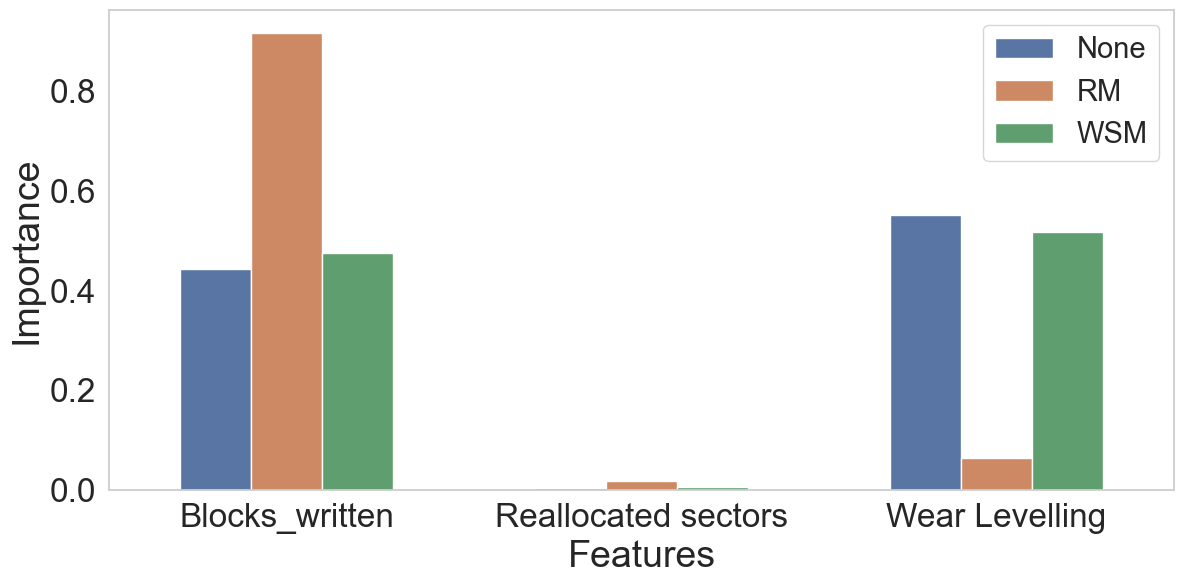

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/934359087.py:62: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Features', y='Importance', hue='App', data=xgb_feature_importances, palette="deep", ci=None, width=bar_width)


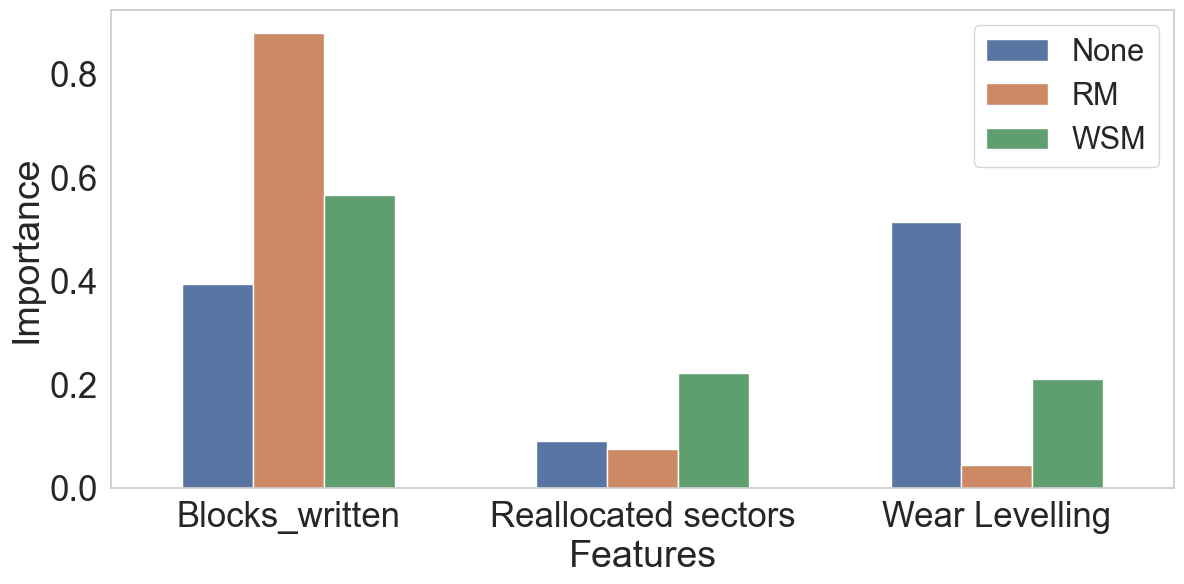

In [403]:
## Plotting feature importances for Random Forest and XGBoost models for all applications

# Customize plotting parameters
font_size = 27
title_size = 18
label_size = 27

# Define custom labels for the x-axis
custom_labels = ['Blocks_written', 'Reallocated sectors', 'Wear Levelling']

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.6

# List of app names
app_names = ['None', 'RM', 'WSM']

# Data for Random Forest and XGBoost feature importances
rf_feature_importances = pd.DataFrame(columns=['Features', 'Importance', 'App'])

for app_name in app_names:
    rf_model = models['best_rf_model_' + app_name]
    rf_importances = rf_model.feature_importances_
    app_feature_importances = pd.DataFrame({
        'Features': custom_labels,
        'Importance': rf_importances,
        'App': [app_name] * len(custom_labels)
    })
    rf_feature_importances = pd.concat([rf_feature_importances, app_feature_importances], ignore_index=True)

xgb_feature_importances = pd.DataFrame(columns=['Features', 'Importance', 'App'])

for app_name in app_names:
    xgb_model = models['best_xgb_model_' + app_name]
    xgb_importances = xgb_model.feature_importances_
    app_feature_importances = pd.DataFrame({
        'Features': custom_labels,
        'Importance': xgb_importances,
        'App': [app_name] * len(custom_labels)
    })
    xgb_feature_importances = pd.concat([xgb_feature_importances, app_feature_importances], ignore_index=True)

# Plot feature importances for Random Forest
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', hue='App', data=rf_feature_importances, palette="deep", ci=None, width=bar_width)
plt.ylabel('Importance', fontsize=label_size)
plt.xlabel('Features', fontsize=label_size)
plt.xticks(fontsize=font_size-3)
plt.yticks(fontsize=font_size-3)
plt.legend(fontsize=21)  # Adjust bbox_to_anchor for position
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationFeatureImportanceRandomForest.pdf')
plt.show()

# Plot feature importances for XGBoost
plt.figure(figsize=(12, 6))
sns.barplot(x='Features', y='Importance', hue='App', data=xgb_feature_importances, palette="deep", ci=None, width=bar_width)
plt.ylabel('Importance', fontsize=label_size)
plt.xlabel('Features', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=22)  # Adjust bbox_to_anchor for position
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationFeatureImportanceXGBoost.pdf')
plt.show()


In [14]:
## Sensitivity analysis to get the highest AFR whithin a given range

import itertools
import numpy as np

# Assuming you have a trained model and X_test dataset
feature_names = ['n_b_written', 'r_sectors', 'w_r_d']

# Define the ranges for each feature
feature_ranges = {
    'n_b_written': [0, 1.5 * 10**12],  # replace min_value and max_value with your desired range
    'r_sectors': [0, 10.116243],
    'w_r_d': [0, 571.376854]
}

# Generate all possible combinations of feature values within the specified ranges
combinations = list(itertools.product(*(feature_ranges[feature] for feature in feature_names)))

# Initialize variables to store the best result
best_target_value = float('-inf')
best_feature_values = None

# Loop through all combinations and calculate predictions
for feature_values in combinations:
    # Create a dictionary with feature names and values
    feature_dict = dict(zip(feature_names, feature_values))

    # Ensure the feature order is consistent with the model
    ordered_feature_values = [feature_dict[feature] for feature in X.columns]

    # Create a DataFrame with a single row for prediction
    input_data = pd.DataFrame([ordered_feature_values], columns=X.columns)

    # Use the XGBoost model to make a prediction
    prediction = best_rf_model.predict(input_data)[0]

    # Check if the current combination produces a higher prediction
    if prediction > best_target_value:
        best_target_value = prediction
        best_feature_values = feature_values

# Print the results
print(f"Highest Target Value: {best_target_value}")
print(f"Best Feature Values: {dict(zip(feature_names, best_feature_values))}")


Highest Target Value: 0.004324617153959176
Best Feature Values: {'n_b_written': 1500000000000.0, 'r_sectors': 0, 'w_r_d': 571.376854}


4/4 [==============================] - 0s 1ms/step


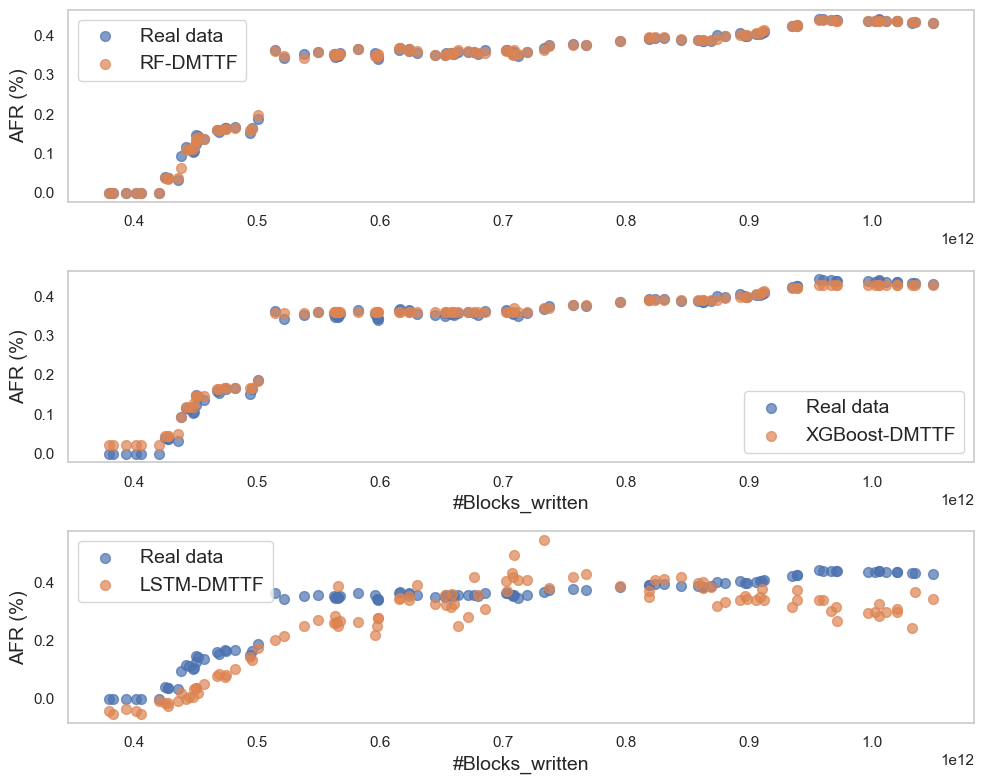

4/4 [==============================] - 0s 972us/step


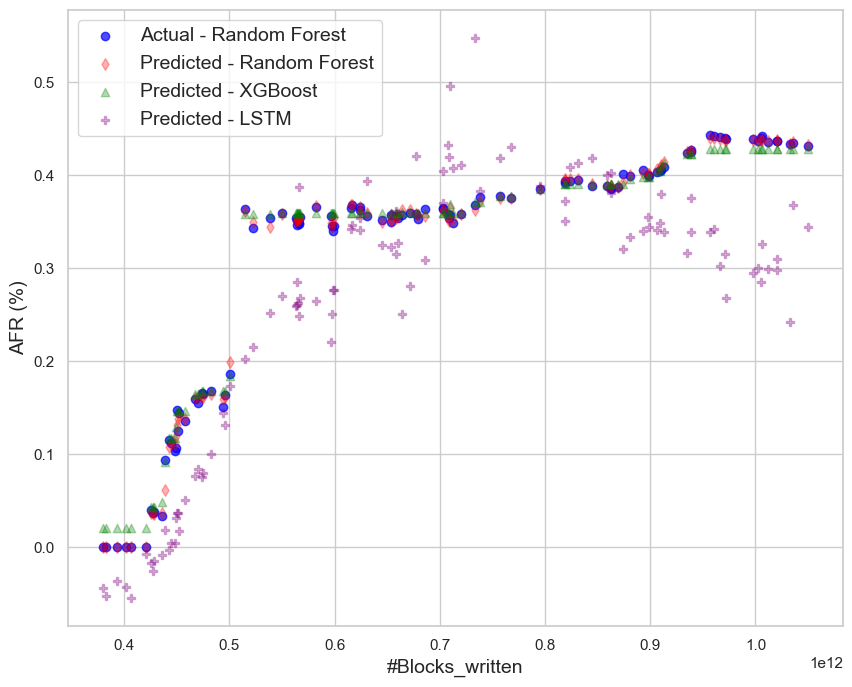

In [477]:
## Plotting Validation Results vs. Predictions for Different Algorithms

# This script generates visual comparisons of actual vs. predicted values for the Random Forest, XGBoost, and LSTM models
# across multiple subfigures and a combined figure, using the validation set. Customize the plot appearance and save the
# resulting figures in PDF format for further analysis.

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8)) # Adjust width and height

appName='WSM'

# Plot Random Forest 
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val)*100, label='RF-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('Random Forest - Validation Set Predictions')
#plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val)*100, label='XGBoost-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('XGBoost - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Real data', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten()*100, label='LSTM-DMTTF', marker='o', alpha=0.7, s=50)
#plt.title('LSTM - Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.grid(False)
plt.legend(fontsize=14)

plt.tight_layout()

# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluation' +appName+ '_3Figure.pdf')
plt.show()

# Plotting all target variable values and predictions in one single figure
plt.figure(figsize=(10, 8)) # Adjust width and height

# Plot Random Forest
plt.scatter(X_val.iloc[:, 0], y_val*100, label='Actual - Random Forest', marker='o', color='blue', alpha=0.7)
plt.scatter(X_val.iloc[:, 0], best_rf_model.predict(X_val)*100, label='Predicted - Random Forest', marker='d', color='red', alpha=0.3)

# Plot XGBoost
plt.scatter(X_val.iloc[:, 0], best_xgb_model.predict(X_val)*100, label='Predicted - XGBoost', marker='^', color='green', alpha=0.3)

# Plot LSTM
plt.scatter(X_val.iloc[:, 0], lstm_model.predict(X_val_lstm).flatten()*100, label='Predicted - LSTM', marker='P', color='purple', alpha=0.3)

#plt.title('Validation Set Predictions')
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
plt.legend(fontsize=14)


# Save the figure in PDF format
plt.savefig('img/MLEvaluation' + appName + '_1Figure.pdf')
plt.show()

4/4 [==============================] - 0s 937us/step


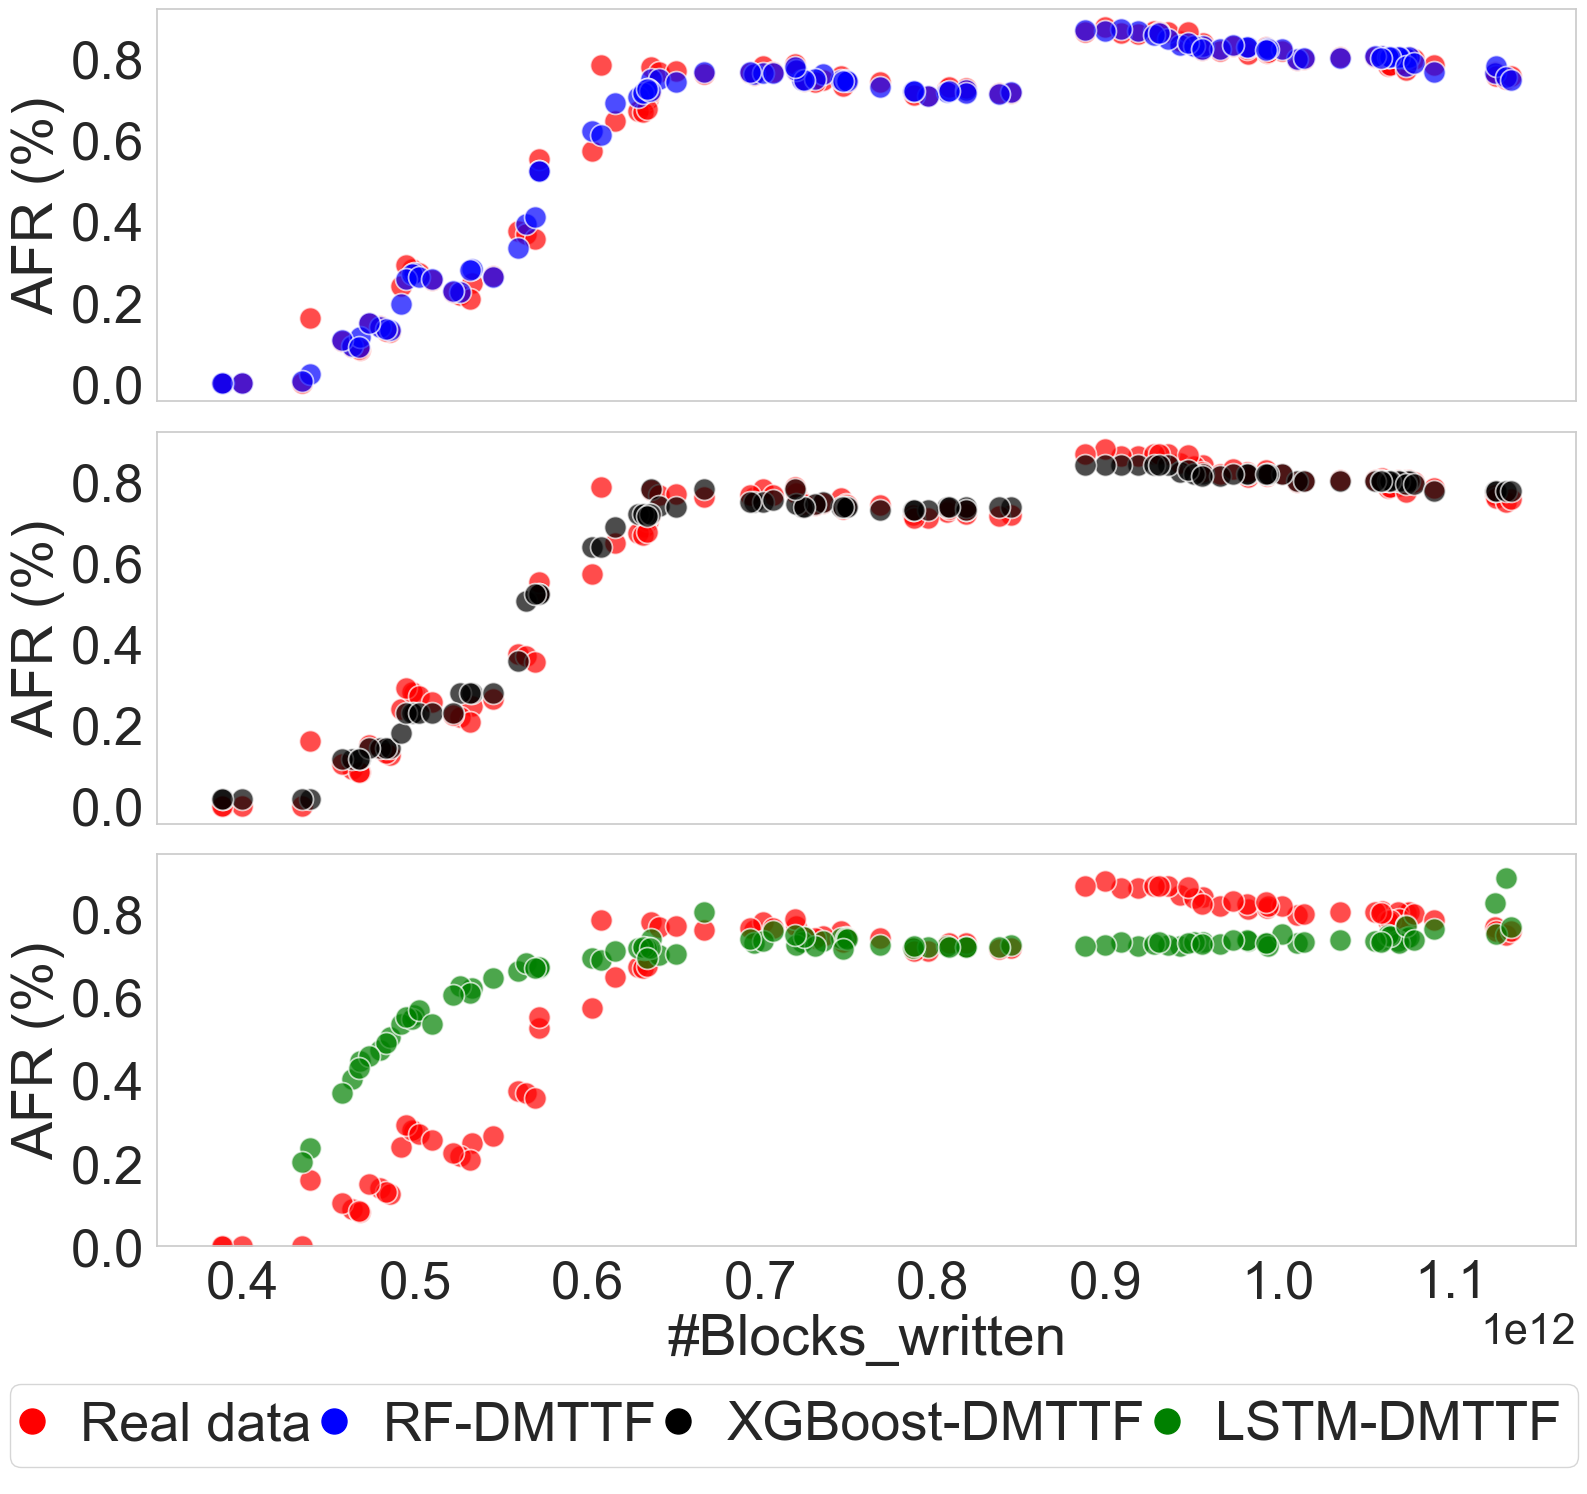

In [800]:
## Plotting Model Validation Results with Custom Legends and Parameters

# This script generates scatter plots to compare actual vs. predicted values for the Random Forest, XGBoost, and LSTM models 
# on the validation set. It customizes the plot appearance, including marker sizes, colors, and legends, and saves the 
# resulting figures in PDF format for further analysis.

import matplotlib.lines as mlines
from matplotlib.legend_handler import HandlerLine2D

# Customize plotting parameters
font_size = 41
label_size = 38
s=250

appName = 'RM'
plt.figure(figsize=(16, 16))  # Adjust width and height

# Define colors
color_real = 'red'
color_rf = 'blue'
color_xgb = 'black'
color_lstm = 'green'

class CustomHandler(HandlerLine2D):
    def create_artists(self, legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans):
        artists = super().create_artists(legend, orig_handle, xdescent, ydescent, width, height, fontsize, trans)
        # Adjust the marker size here
        for artist in artists:
            artist.set_markersize(18)  # Set a larger marker size
        return artists


# Random Forest
plt.subplot(3, 1, 1)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=best_rf_model.predict(X_val)*100, color=color_rf, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel("")
plt.grid(False)
plt.xticks([])
plt.yticks(fontsize=label_size)

# XGBoost
plt.subplot(3, 1, 2)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=best_xgb_model.predict(X_val)*100, color=color_xgb, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel("")
plt.grid(False)
plt.xticks([])
plt.yticks(fontsize=label_size)

# LSTM
plt.subplot(3, 1, 3)
sns.scatterplot(x=X_val.iloc[:, 0], y=y_val*100, color=color_real, alpha=0.7, s=s)
sns.scatterplot(x=X_val.iloc[:, 0], y=lstm_model.predict(X_val_lstm).flatten()*100, color=color_lstm, alpha=0.7, s=s)
plt.ylabel('AFR (%)', fontsize=font_size)
plt.xlabel('#Blocks_written', fontsize=font_size)
plt.xticks(fontsize=label_size)
plt.yticks(fontsize=label_size)
plt.ylim(bottom=0)
plt.grid(False)

# Adjust the font size of the x-axis order of magnitude
ax = plt.gca()
ax.xaxis.get_offset_text().set_fontsize(label_size-7)

# Create custom legend
legend_elements = [mlines.Line2D([], [], color=color_real, marker='o', linestyle='None', label='Real data'),
                   mlines.Line2D([], [], color=color_rf, marker='o', linestyle='None', label='RF-DMTTF'),
                   mlines.Line2D([], [], color=color_xgb, marker='o', linestyle='None', label='XGBoost-DMTTF'),
                   mlines.Line2D([], [], color=color_lstm, marker='o', linestyle='None', label='LSTM-DMTTF')]
# Adjust legend parameters
plt.figlegend(handles=legend_elements, loc='lower center', ncol=4, fontsize=font_size-2, 
              borderpad=0.3, handler_map={mlines.Line2D: CustomHandler()}, labelspacing=0.05, handlelength=0.2, columnspacing=0.3)

plt.tight_layout(rect=[0, 0.08, 1, 0.95])  # Adjust the rect to make space for the legend

plt.savefig(f'img/MLEvaluation_{appName}_3Figure.pdf')
plt.show()


1/1 [==============================] - 0s 9ms/step


/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/sklearn/base.py:464: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with featur

1/1 [==============================] - 0s 8ms/step


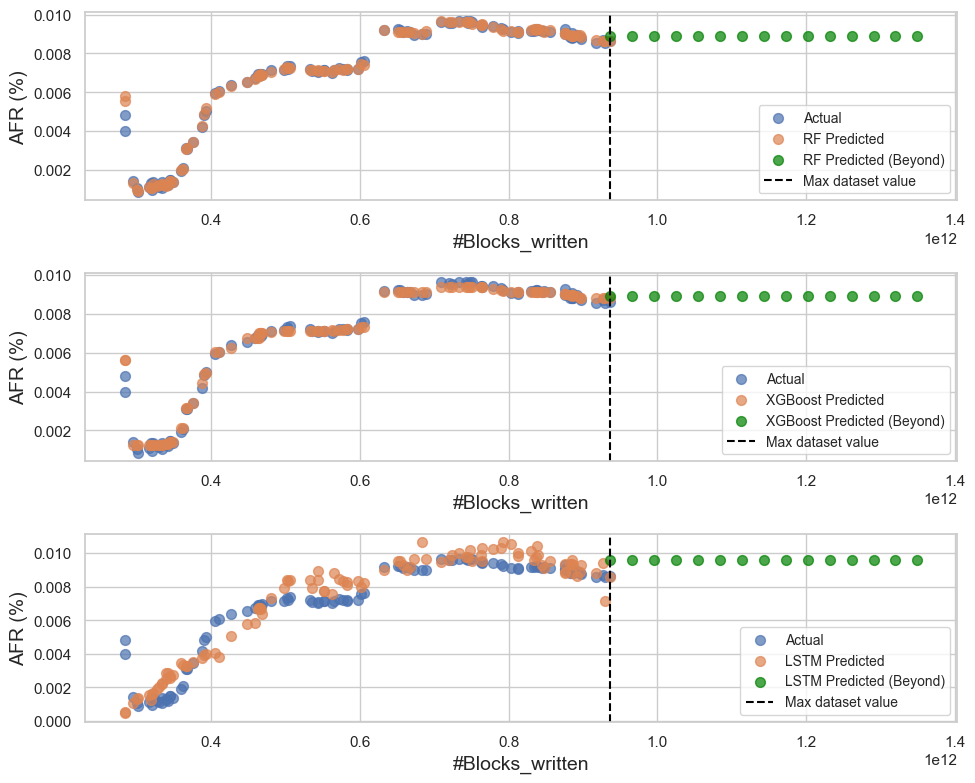

In [307]:
## Plotting Validation Data, Model Predictions, and Extrapolated Predictions

# This script visualizes the actual vs. predicted values from the Random Forest, XGBoost, and LSTM models on the validation
# dataset. Additionally, it includes extrapolated predictions beyond the maximum value in the validation set to demonstrate
# the model's behavior on unseen data. The resulting figures are saved in PDF format for further analysis.

from matplotlib.lines import Line2D

# Assuming you have defined your models and data (best_rf_val_preds, best_xgb_val_preds, best_lstm_val_preds, X_val, y_val) earlier
appName = 'None'

# Set the maximum prediction value for the green line
max_pred_value = 1.35 * 10**12  # Change this value according to your requirements

# Generate num_values equidistant values between X_val.iloc[:, 0].max() and max_pred_value
num_values = 15
pred_values = np.linspace(X_val.iloc[:, 0].max(), max_pred_value, num=num_values)

# Plotting all target variable values and predictions in 3 subfigures
plt.figure(figsize=(10, 8))  # Adjust width and height

best_rf_val_preds = best_rf_model.predict(X_val)
best_xgb_val_preds = best_xgb_model.predict(X_val)
best_lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

# Plot Random Forest
plt.subplot(3, 1, 1)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_rf_val_preds, label='RF Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_rf_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='RF Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
#plt.legend(handles=[legend_line], fontsize=14, bbox_to_anchor=(1.05, 1), loc='upper left')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot XGBoost
plt.subplot(3, 1, 2)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_xgb_val_preds, label='XGBoost Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [best_xgb_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3))[0] for value in pred_values],
            label='XGBoost Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

# Plot LSTM
plt.subplot(3, 1, 3)
plt.scatter(X_val.iloc[:, 0], y_val, label='Actual', marker='o', alpha=0.7, s=50)
plt.scatter(X_val.iloc[:, 0], best_lstm_val_preds, label='LSTM Predicted', marker='o', alpha=0.7, s=50)
plt.scatter(pred_values, [lstm_model.predict(np.array([[value, 10.116243, 571.376854]]).reshape(1, 3, 1))[0, 0] for value in pred_values],
            label='LSTM Predicted (Beyond)', marker='o', color='green', alpha=0.7, s=50)
plt.axvline(x=X_val.iloc[:, 0].max(), color='black', linestyle='--', label='Max dataset value')
#plt.axvline(x=max_pred_value, color='green', linestyle='--', label='Prediction Limit')
plt.legend(fontsize=10, loc='lower right')  # Adjust bbox_to_anchor for position
plt.xlabel('#Blocks_written', fontsize=14)
plt.ylabel('AFR (%)', fontsize=14)
#plt.legend(fontsize=14)

plt.tight_layout()

# Save the figure in PDF format (remember to change the app name)
plt.savefig('img/MLEvaluation' + appName + '_3FigureBeyond.pdf', bbox_inches='tight')
plt.show()


In [26]:
## Generating Predictions for a Specific Data Point

# This script defines a function to generate predictions from various types of models, given a specific input data point.
# The function handles different model types, including traditional machine learning models and Keras Sequential models.

# Function to provide inputs for the model and get predictions
def get_predictions(model, X_input):
    if hasattr(model, 'predict'):  # Check if the model has a predict method
        return model.predict(X_input)
    elif isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        X_input_lstm = np.reshape(X_input.values, (X_input.shape[0], X_input.shape[1], 1)).astype('float32')
        return model.predict(X_input_lstm).flatten()
    else:
        raise ValueError("Unsupported model type")

# Example usage for the best RandomForestRegressor model
input_data_rf = pd.DataFrame({'n_b_written': [1.35 * 10**12], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
rf_predictions = get_predictions(best_rf_model, input_data_rf)
print("Random Forest Predictions:", rf_predictions)

'''
# Example usage for the best XGBRegressor model
input_data_xgb = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
xgb_predictions = get_predictions(best_xgb_model, input_data_xgb)
print("XGBoost Predictions:", xgb_predictions)

# Example usage for the best LSTM model
input_data_lstm = pd.DataFrame({'n_b_written': [your_value], 'r_sectors': [your_value], 'w_r_d': [your_value]})
lstm_predictions = get_predictions(lstm_model, input_data_lstm)
print("LSTM Predictions:", lstm_predictions)
'''

Random Forest Predictions: [0.00250603]


'\n# Example usage for the best XGBRegressor model\ninput_data_xgb = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nxgb_predictions = get_predictions(best_xgb_model, input_data_xgb)\nprint("XGBoost Predictions:", xgb_predictions)\n\n# Example usage for the best LSTM model\ninput_data_lstm = pd.DataFrame({\'n_b_written\': [your_value], \'r_sectors\': [your_value], \'w_r_d\': [your_value]})\nlstm_predictions = get_predictions(lstm_model, input_data_lstm)\nprint("LSTM Predictions:", lstm_predictions)\n'

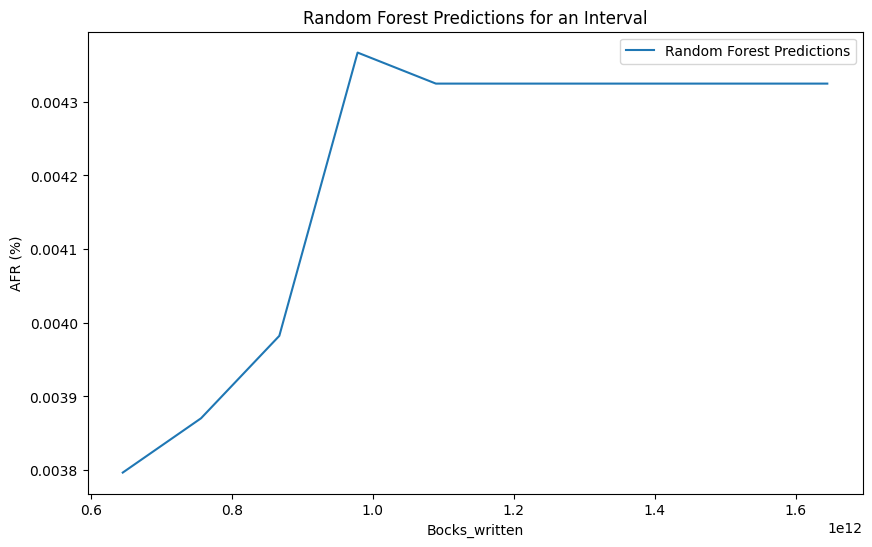

"\n# Example usage for the best XGBRegressor model\nxgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)\n\n# Plotting the results for the XGBRegressor model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')\nplt.title('XGBoost Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n\n\n# Example usage for the best LSTM model\nlstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)\n\n# Plotting the results for the LSTM model\nplt.figure(figsize=(10, 6))\nplt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')\nplt.title('LSTM Predictions for an Interval')\nplt.xlabel('Bocks_written')\nplt.ylabel('AFR (%)')\nplt.legend()\nplt.show()\n"

In [158]:
## Generating Predictions for a Range of Values

# This script defines functions to generate predictions over a specified interval for different types of models, 
# including traditional machine learning models and Keras Sequential models (LSTM). It demonstrates how to create 
# predictions for a range of input values and provides examples for plotting the results.

def get_predictions_for_interval(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = pd.DataFrame({'n_b_written': [value], 'r_sectors': [10.116243], 'w_r_d': [571.376854]})
        prediction = get_predictions(model, input_data)
        predictions.append(prediction)
    return np.array(predictions)


def get_predictions_for_interval_lstm(model, X_interval):
    predictions = []
    for value in X_interval:
        input_data = np.reshape(np.array([[value, 10.116243, 571.376854]]), (1, 3, 1))
        prediction = model.predict(input_data)[0][0]
        predictions.append(prediction)
    return np.array(predictions)


# Set the range of values for the feature
feature_range = np.linspace(0.645079e+12, 1.645079e+12, 10)


# Example usage for the best RandomForestRegressor model
rf_predictions_interval = get_predictions_for_interval(best_rf_model, feature_range)

# Plotting the results for the RandomForestRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, rf_predictions_interval, label='Random Forest Predictions')
plt.title('Random Forest Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


'''
# Example usage for the best XGBRegressor model
xgb_predictions_interval = get_predictions_for_interval(best_xgb_model, feature_range)

# Plotting the results for the XGBRegressor model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, xgb_predictions_interval, label='XGBoost Predictions')
plt.title('XGBoost Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()


# Example usage for the best LSTM model
lstm_predictions_interval = get_predictions_for_interval_lstm(lstm_model, feature_range)

# Plotting the results for the LSTM model
plt.figure(figsize=(10, 6))
plt.plot(feature_range, lstm_predictions_interval, label='LSTM Predictions')
plt.title('LSTM Predictions for an Interval')
plt.xlabel('Bocks_written')
plt.ylabel('AFR (%)')
plt.legend()
plt.show()
'''

In [12]:
## Combining Random Forest and XGBoost Models for Multiple Applications

# This script loads the best-performing Random Forest and XGBoost models for three different applications (None, RM, WSM), 
# combines them into ensemble models using the VotingRegressor, and then creates a final combined model incorporating both 
# Random Forest and XGBoost ensembles. The models are trained on a concatenated dataset from all three applications, 
# and the resulting ensemble models are saved for future use.

## *** Filename with Backup at the end will use the best models that are stored
## *** Filename without Backup at the end will use those models that are loaded into the memory 

from sklearn.ensemble import RandomForestRegressor, VotingRegressor

# List of app names
app_names = ['None', 'RM', 'WSM']

# Load and concatenate datasets from all three apps
combined_df = pd.concat([pd.read_csv(f'DatasetML/extractedFeaturesMLTraining{app_name}.csv') for app_name in app_names])

# Data preprocessing for the combined dataset
X_combined = combined_df[['n_b_written', 'r_sectors', 'w_r_d']]
y_combined = combined_df['AFR_SSDs']

# Load individual Random Forest models for each app
rf_model_none = joblib.load('MLModels/best_rf_modelNoneBackup.joblib')
rf_model_wsm = joblib.load('MLModels/best_rf_modelWSMBackup.joblib')
rf_model_rm = joblib.load('MLModels/best_rf_modelRMBackup.joblib')

# Load individual XGBoost models for each app
xgb_model_none = joblib.load('MLModels/best_xgb_modelNoneBackup.joblib')
xgb_model_wsm = joblib.load('MLModels/best_xgb_modelWSMBackup.joblib')
xgb_model_rm = joblib.load('MLModels/best_xgb_modelRMBackup.joblib')

# Create a VotingRegressor for Random Forest
rf_ensemble_model = VotingRegressor(estimators=[
    ('none', rf_model_none),
    ('wsm', rf_model_wsm),
    ('rm', rf_model_rm)
])

# Create a VotingRegressor for XGBoost
xgb_ensemble_model = VotingRegressor(estimators=[
    ('none', xgb_model_none),
    ('wsm', xgb_model_wsm),
    ('rm', xgb_model_rm)
])

# Train the ensemble models on the combined dataset
rf_ensemble_model.fit(X_combined, y_combined)
xgb_ensemble_model.fit(X_combined, y_combined)

# Save the ensemble models
joblib.dump(rf_ensemble_model, 'MLModels/ensemble_rf_model.joblib')
joblib.dump(xgb_ensemble_model, 'MLModels/ensemble_xgb_model.joblib')

# Combining RF and XGBoost models into one model (if needed)
ensemble_model = VotingRegressor(estimators=[
    ('rf', rf_ensemble_model),
    ('xgb', xgb_ensemble_model)
])

# Train the combined ensemble model on the combined dataset
ensemble_model.fit(X_combined, y_combined)

# Save the combined ensemble model
joblib.dump(ensemble_model, 'MLModels/ensemble_model.joblib')


['MLModels/ensemble_model.joblib']

In [9]:
## Loading the Ensemble Models

# This script loads pre-trained ensemble models for Random Forest and XGBoost. These models are combined ensemble models 
# created by aggregating the best-performing individual models for three different applications (None, RM, WSM). 
# The models are stored as joblib files and can be used for making predictions or further analysis.

rf_ensemble_model = joblib.load('MLModels/ensemble_rf_model.joblib')
xgb_ensemble_model  = joblib.load('MLModels/ensemble_xgb_model.joblib')
#ensemble_model  = joblib.load('MLModels/ensemble_model.joblib')
    

In [21]:
## Sensitivity Analysis for Highest AFR Prediction within Given Feature Ranges using Ensemble Model

# This script performs sensitivity analysis to determine the highest predicted Annual Failure Rate (AFR)
# within specified ranges of features using a trained ensemble Random Forest model.
# The goal is to find the combination of feature values that yields the maximum AFR prediction.

import itertools

# Assuming you have a trained model and X_test dataset
feature_names = ['n_b_written', 'r_sectors', 'w_r_d']

# Define the ranges for each feature
feature_ranges = {
    'n_b_written': [0, 134250000],  # 64GiB (16 threads * 4GiB) because this is the volume used in GekoFS paper (Total LBAs written, sector size=512bytes)
    'r_sectors': [0, 10.116243],
    'w_r_d': [0, 571.376854]
}

# Generate all possible combinations of feature values within the specified ranges
combinations = list(itertools.product(*(feature_ranges[feature] for feature in feature_names)))

# Initialize variables to store the best result
best_target_value = float('-inf')
best_feature_values = None

# Loop through all combinations and calculate predictions
for feature_values in combinations:
    # Create a dictionary with feature names and values
    feature_dict = dict(zip(feature_names, feature_values))
 
    # Ensure the feature order is consistent with the model
    ordered_feature_values = [feature_dict[feature] for feature in X_combined.columns]

    # Create a DataFrame with a single row for prediction
    input_data = pd.DataFrame([ordered_feature_values], columns=X_combined.columns)

    # Use the ensemble model to make a prediction
    prediction = rf_ensemble_model.predict(input_data)[0]

    # Check if the current combination produces a higher prediction
    if prediction > best_target_value:
        best_target_value = prediction
        best_feature_values = feature_values

# Print the results
print(f"Highest Target AFR Value: {best_target_value}")
print(f"Best Feature Values: {dict(zip(feature_names, best_feature_values))}")


Highest Target AFR Value: 0.008210842993450602
Best Feature Values: {'n_b_written': 0, 'r_sectors': 0, 'w_r_d': 571.376854}


In [426]:
# Predicting AFR using the Ensemble Model for a Specific Data Point (Gekko-related Experiment)

# This function takes a model and input data to return predictions.
def get_predictions(model, X_input):
    if hasattr(model, 'predict'):  # Check if the model has a predict method
        return model.predict(X_input)
    elif isinstance(model, Sequential):  # Check if the model is a Keras Sequential model
        X_input_lstm = np.reshape(X_input.values, (X_input.shape[0], X_input.shape[1], 1)).astype('float32')
        return model.predict(X_input_lstm).flatten()
    else:
        raise ValueError("Unsupported model type")

# Example usage for the best RandomForestRegressor model
input_data_rf = pd.DataFrame({'n_b_written': [134250000], 'r_sectors': [0], 'w_r_d': [571.376854]})
rf_predictions = get_predictions(rf_ensemble_model, input_data_rf)
print("Random Forest Predictions:", rf_predictions)

Random Forest Predictions: [0.00821084]


In [844]:
## GSPN Gekko Validation

# This script calculates the 95% confidence interval for mean Gekko performability results
# and appends the results to the original CSV files.

from scipy import stats

# Function to calculate confidence interval
def calculate_confidence_interval(row):
    mean = row['Mean_gekko']
    std_dev = row['std_gekko']

    # Check if 'Mean_gekko' and 'std_gekko' are valid numbers
    if not pd.notna(mean) or not pd.notna(std_dev) or not np.isfinite(mean) or not np.isfinite(std_dev) or std_dev <= 0:
        return "Invalid data"

    # Set the sample size
    n = 5

    # Calculate the standard error of the mean
    sem = std_dev / (n**0.5)

    # Calculate the confidence interval
    lower, upper = stats.norm.interval(0.95, loc=mean, scale=sem)

    return f"({lower:.2f}; {upper:.2f})"

# Input file paths
input_file_path_1 = 'ExperimentalResults/gekkoRdPerformabilityResultsValidation.csv'
input_file_path_2 = 'ExperimentalResults/gekkoSeqPerformabilityResultsValidation.csv'

# Output file paths
output_file_path_1 = 'ExperimentalResults/updated_gekkoRdPerformabilityResultsValidation.csv'
output_file_path_2 = 'ExperimentalResults/updated_gekkoSeqPerformabilityResultsValidation.csv'

# Load the data from the first CSV file
data_1 = pd.read_csv(input_file_path_1, sep=';')

# Apply the function to each row and create a new column 'confidence_interval'
data_1['confidence_interval'] = data_1.apply(calculate_confidence_interval, axis=1)

# Save the result to the first output CSV file
data_1.to_csv(output_file_path_1, index=False)

print(f"Processed {input_file_path_1} and saved the result to {output_file_path_1}")

# Load the data from the second CSV file
data_2 = pd.read_csv(input_file_path_2, sep=';')

# Apply the function to each row and create a new column 'confidence_interval'
data_2['confidence_interval'] = data_2.apply(calculate_confidence_interval, axis=1)

# Save the result to the second output CSV file
data_2.to_csv(output_file_path_2, index=False)

print(f"Processed {input_file_path_2} and saved the result to {output_file_path_2}")


Processed ExperimentalResults/gekkoRdPerformabilityResultsValidation.csv and saved the result to ExperimentalResults/updated_gekkoRdPerformabilityResultsValidation.csv
Processed ExperimentalResults/gekkoSeqPerformabilityResultsValidation.csv and saved the result to ExperimentalResults/updated_gekkoSeqPerformabilityResultsValidation.csv


In [76]:
## Loading CSV files containing worst-case data reliability results for three applications (512 nodes, highest AFR) over 480 hours

dfRF = pd.read_csv('ExperimentalResults/' + 'ExperimentalResultsDataReliabilityWorstCaseRF' + '.csv')
dfXGBoost = pd.read_csv('ExperimentalResults/' + 'ExperimentalResultsDataReliabilityWorstCaseXGBoost' + '.csv')

In [811]:
## Loading CSV files containing worst-case reliability evaluations over 2 years for three applications (512 nodes and highest AFR)

dfRF = pd.read_csv('ExperimentalResults/' + 'ReliabilityEvaluationOverTimeWorstCase2YearsRF' + '.csv', sep=';')
dfXGBoost = pd.read_csv('ExperimentalResults/' + 'ReliabilityEvaluationOverTimeWorstCase2YearsXGBoost' + '.csv', sep=';')

In [295]:
# Displaying the first few rows of the DataFrame `dfRF` to inspect the best cases reliability evaluation over 2 years using RandomForestRegressor.

dfRF.head()

time (h)      None        RM       WSM     Gekko
0         0  1.000000  1.000000  1.000000  1.000000
1       730  0.684799  0.724064  0.831506  0.704456
2      1460  0.468950  0.524269  0.691402  0.496258
3      2190  0.321136  0.379604  0.574905  0.349592
4      2920  0.219914  0.274858  0.478037  0.246272

In [294]:
# Displaying the last few rows of the DataFrame `dfXGBoost` to inspect the worst case reliability evaluation over 2 years using XGBoost.

dfXGBoost.tail()

time (h)      None        RM       WSM
20     14600  0.000505  0.001399  0.029357
21     15330  0.000345  0.001007  0.024609
22     16060  0.000236  0.000725  0.020629
23     16790  0.000162  0.000522  0.017293
24     17520  0.000111  0.000376  0.014496

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


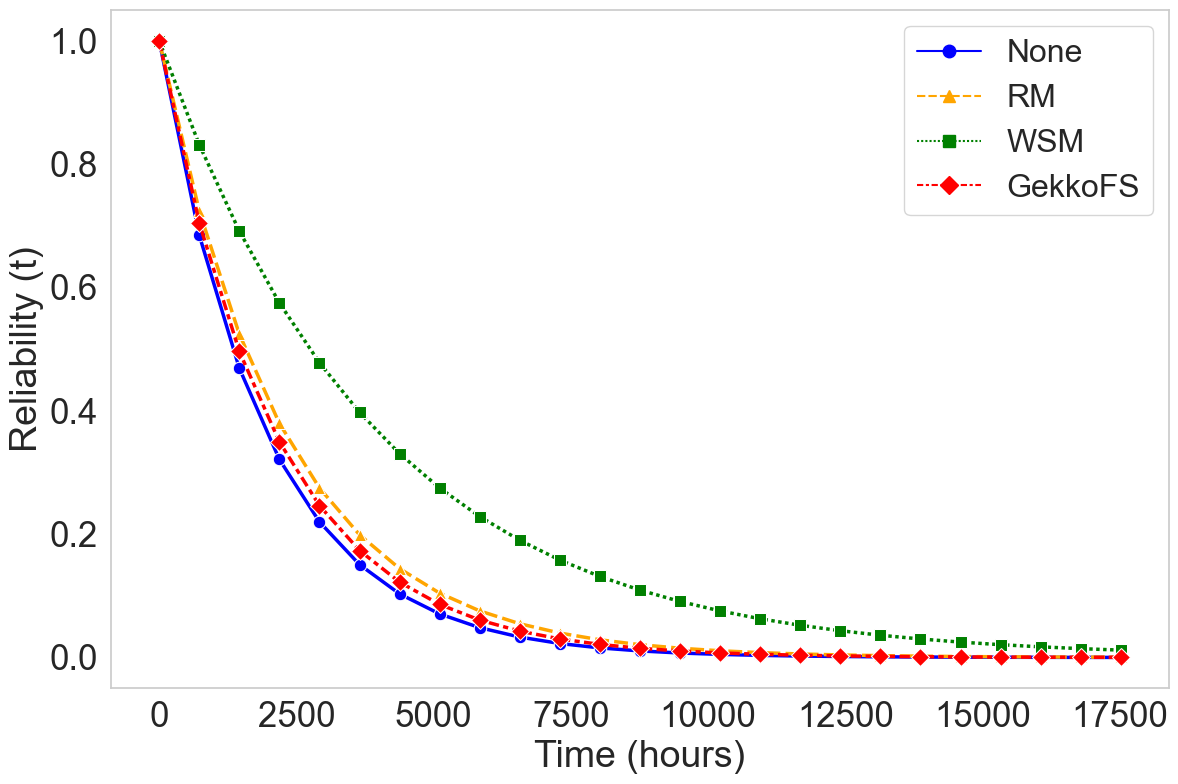

/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/ericborba/Library/Python/3.9/lib/python/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


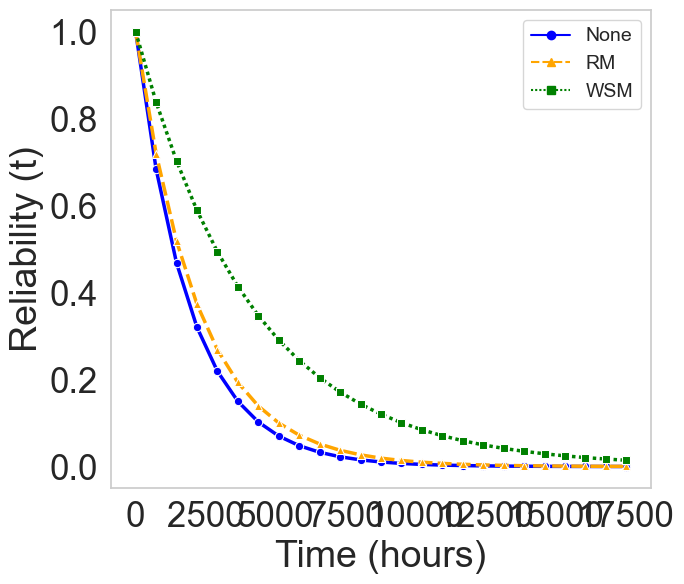

In [813]:
## Configure and visualize reliability trends over time for Random Forest and XGBoost models across different applications.
## Plotting worst case for the three apps (512 nodes and hightest AFR)

# Customize plotting parameters
font_size = 27
label_size = 27
line_width = 2.5
marker_size = 9  # Increase the marker size as needed

# Set the Seaborn style
sns.set(style="whitegrid")

# Define custom colors for each app
app_colors = {'None': 'blue', 'RM': 'orange', 'WSM': 'green', 'GekkoFS': 'red'}

# Define markers for each line
line_markers = {'None': 'o', 'RM': '^', 'WSM': 's', 'GekkoFS': 'D'}

# Create the line plot for Random Forest
plt.figure(figsize=(12, 8))
ax = sns.lineplot(
    data=dfRF.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    style='App',
    markers=line_markers,
    linewidth=line_width
)


# Set marker size for each line
for line in ax.lines:
    line.set_markersize(marker_size)

plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=23)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseRF.pdf', bbox_inches='tight')
plt.show()


# Create the line plot for XGBoost
plt.figure(figsize=(7, 6))
sns.lineplot(
    data=dfXGBoost.melt(id_vars='time (h)', var_name='App', value_name='Reliability (t)'),
    x='time (h)',
    y='Reliability (t)',
    hue='App',
    palette=app_colors,
    style='App',  # Ensure different markers are used
    markers=line_markers,  # Use custom markers
    linewidth=line_width
)
plt.xlabel('Time (hours)', fontsize=label_size)
plt.ylabel('Reliability (t)', fontsize=label_size)
plt.xticks(fontsize=font_size-2)
plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=14)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/MLEvaluationReliability3AppsOverTimeWorstCaseXGBoost.pdf', bbox_inches='tight')
plt.show()


In [328]:
## Computing System Reliability Metrics using RBD (Reliability Block Diagram) Analysis

import pandas as pd
from decimal import Decimal, getcontext

def calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names):
    """
    Calculate system mean time between failures (MTBF) and mean time to repair (MTTR) metrics
    for different applications using RBD analysis under either series or parallel configuration.

    Parameters:
    - mtbf_values: List of MTBF (Mean Time Between Failures) values for different applications.
    - mttr_values: List of MTTR (Mean Time To Repair) values (currently supports single value).
    - num_blocks_values: List of integers specifying number of blocks in the system configuration.
    - system_type: Type of system configuration ('series' or 'parallel').
    - application_names: List of application names corresponding to each MTBF value.

    Returns:
    - DataFrame containing computed metrics including Application Name, Number of Blocks, 
      Input MTBF, Input MTTR, System MTBF, and System MTTR.

    Raises:
    - ValueError if system_type is not 'series' or 'parallel'.

    Note:
    - The system assumes all blocks are identical and configured either in series or parallel.
    """

    results = []

    # Set decimal precision
    getcontext().prec = 10

    for mtbf, app_name in zip(mtbf_values, application_names):
        for mttr in mttr_values:
            for num_blocks in num_blocks_values:
                mtbf_decimal = Decimal(mtbf)  # Convert mtbf to Decimal
                mttr_decimal = Decimal(mttr)  # Convert mttr to Decimal

                if system_type == 'series':
                    system_mtbf = Decimal(1) / (sum([Decimal(1) / mtbf_decimal for _ in range(num_blocks)]))
                    system_mttr = sum([mttr_decimal for _ in range(num_blocks)])
                elif system_type == 'parallel':
                    system_mtbf = (((Decimal(1)) / (Decimal(1) / mtbf_decimal)) * (sum([Decimal(1) / i for i in range(1, num_blocks + 1)])))
                    system_mttr = mttr_decimal  # MTTR in parallel is the same as individual MTTR
                else:
                    raise ValueError("Invalid system_type. Use 'series' or 'parallel'.")
                
                results.append({
                    'Application_Name': app_name,
                    'Num_Blocks': num_blocks,
                    'MTBF_Input': mtbf,
                    'MTTR_Input': mttr,
                    'System_MTBF': system_mtbf,
                    'System_MTTR': system_mttr
                })

    return pd.DataFrame(results)

# Define application names corresponding to each MTBF value
application_names = ["none", 'RM', 'WSM', 'Gekko']  # Add more as needed

# Load mtbf_values from CSV
# mtbf_df = pd.read_csv('mtbf_values.csv')  # Replace 'mtbf_values.csv' with your file name
# mtbf_values = mtbf_df['MTBF'].to_numpy()

# mttf worst cases for None, RM, and WSM
# 64GiB (16 threads * 4GiB) because this is the volume used in GekoFS paper (Total LBAs written, sector size=512bytes)
mtbf_values = [987137.8067, 1157597.828, 2025612.832, 1066882,317]
mttr_values = [1]
num_blocks_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Specify system type ('series' or 'parallel')
system_type = 'series'

# Perform experiments and store results in a DataFrame
metrics_result = calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names)
print(metrics_result)

# Save results to CSV (change the filename for the correct algorithm name)
metrics_result.to_csv('ExperimentalResults/RBDresultsRF.csv', index=False)


   Application_Name  Num_Blocks    MTBF_Input  MTTR_Input  System_MTBF  \
0              none           1  9.871378e+05           1  987137.8066   
1              none           2  9.871378e+05           1  493568.9033   
2              none           4  9.871378e+05           1  246784.4517   
3              none           8  9.871378e+05           1  123392.2258   
4              none          16  9.871378e+05           1  61696.11299   
5              none          32  9.871378e+05           1  30848.05655   
6              none          64  9.871378e+05           1  15424.02829   
7              none         128  9.871378e+05           1  7712.014113   
8              none         256  9.871378e+05           1  3856.007028   
9              none         512  9.871378e+05           1  1928.003507   
10               RM           1  1.157598e+06           1  1157597.828   
11               RM           2  1.157598e+06           1  578798.9141   
12               RM           4  1.157

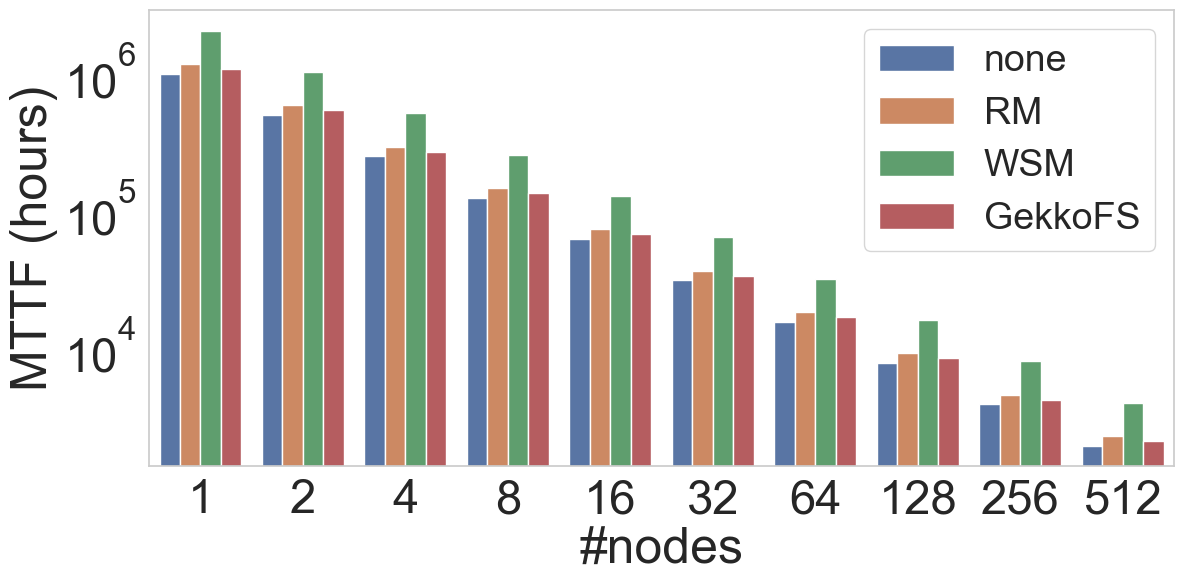

In [909]:
# Plotting System Mean Time to Failure (MTTF) as Number of Nodes Increases
# Utilizing the worst MTTF estimated using DMTTF for each node configuration per application.

# Load the data from the CSV file
metrics_result = pd.read_csv('ExperimentalResults/RBDresultsRF.csv', sep=";")

# Customize plotting parameters
font_size =36
title_size = 18
label_size = 36

# Set the Seaborn style
sns.set(style="whitegrid")

# Set the width of the bars
bar_width = 0.8

# List of application names
application_names = metrics_result['Application_Name'].unique()

# Plot system MTBF for each application
plt.figure(figsize=(12, 6))
sns.barplot(x='Num_Blocks', y='System_MTBF', hue='Application_Name', data=metrics_result, palette="deep", width=bar_width)
plt.ylabel('MTTF (hours)', fontsize=label_size)
plt.xlabel('#nodes', fontsize=label_size)
plt.xticks(fontsize=font_size-2)

# Set y-axis to logarithmic scale
plt.yscale('log')

plt.yticks(fontsize=font_size-2)
plt.legend(fontsize=27)  # Adjust bbox_to_anchor for position
#plt.title('System MTBF for Different Applications', fontsize=title_size)
plt.tight_layout()
plt.grid(False)
plt.savefig('img/SystemMTTFEvaluationFunctionNodesPerApp.pdf', bbox_inches='tight')
plt.show()


<span style="color:red;font-weight:700;font-size:20px">
    As of this point, only Gekko Experiments
</span>

In [194]:
# For Gekko-related experiments
# Computing Reliability Block Diagrams (RBDs) to derive System Mean Time to Failure (MTTF).
# MTTR was not checked in this analysis.
# Considering all blocks identical and using a single type of arrangement (either series or parallel).

import pandas as pd
from decimal import Decimal, getcontext

def calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names):
    results = []

    # Set decimal precision
    getcontext().prec = 10

    for mtbf, app_name in zip(mtbf_values, application_names):
        for mttr in mttr_values:
            for num_blocks in num_blocks_values:
                mtbf_decimal = Decimal(mtbf)  # Convert mtbf to Decimal
                mttr_decimal = Decimal(mttr)  # Convert mttr to Decimal

                if system_type == 'series':
                    system_mtbf = Decimal(1) / (sum([Decimal(1) / mtbf_decimal for _ in range(num_blocks)]))
                    system_mttr = sum([mttr_decimal for _ in range(num_blocks)])
                elif system_type == 'parallel':
                    system_mtbf = (((Decimal(1)) / (Decimal(1) / mtbf_decimal)) * (sum([Decimal(1) / i for i in range(1, num_blocks + 1)])))
                    system_mttr = mttr_decimal  # MTTR in parallel is the same as individual MTTR
                else:
                    raise ValueError("Invalid system_type. Use 'series' or 'parallel'.")
                
                results.append({
                    'Application_Name': app_name,
                    'Num_Blocks': num_blocks,
                    'MTBF_Input': mtbf,
                    'MTTR_Input': mttr,
                    'System_MTBF': system_mtbf,
                    'System_MTTR': system_mttr
                })

    return pd.DataFrame(results)

# Define application names corresponding to each MTBF value
application_names = ['Gekko']  # Add more as needed

# Load mtbf_values from CSV
# mtbf_df = pd.read_csv('mtbf_values.csv')  # Replace 'mtbf_values.csv' with your file name
# mtbf_values = mtbf_df['MTBF'].to_numpy()

# mttf worst case for Gekko aplication 64GiB
number_hours_year = 365*24
mtbf_values = [number_hours_year/rf_predictions[0]] # 0.00821084
mttr_values = [1]
num_blocks_values = [1, 2, 4, 8, 16, 32, 64, 128, 256, 512]

# Specify system type ('series' or 'parallel')
system_type = 'series'

# Perform experiments and store results in a DataFrame
metrics_result = calculate_reliability_block_diagram(mtbf_values, mttr_values, num_blocks_values, system_type, application_names)
print(metrics_result)

# Save results to CSV (change the filename for the correct algorithm name)
metrics_result.to_csv('ExperimentalResults/RBDresultsRFGekko.csv', index=False)


  Application_Name  Num_Blocks    MTBF_Input  MTTR_Input  System_MTBF  \
0            Gekko           1  1.066882e+06           1  1066881.928   
1            Gekko           2  1.066882e+06           1  533440.9638   
2            Gekko           4  1.066882e+06           1  266720.4819   
3            Gekko           8  1.066882e+06           1  133360.2409   
4            Gekko          16  1.066882e+06           1  66680.12058   
5            Gekko          32  1.066882e+06           1  33340.06034   
6            Gekko          64  1.066882e+06           1  16670.03018   
7            Gekko         128  1.066882e+06           1  8335.015152   
8            Gekko         256  1.066882e+06           1  4167.507651   
9            Gekko         512  1.066882e+06           1  2083.753844   

  System_MTTR  
0           1  
1           2  
2           4  
3           8  
4          16  
5          32  
6          64  
7         128  
8         256  
9         512  


In [196]:
## Approximating delay distributions of GekkoFS using phase-type distributions
## based on moment matching technique and given mean (mu_d) and standard deviation (sigma_d).
## This script was developed but not utilized for this article, as the requests were considered exponential.

import numpy as np

def phase_approximation(mu_d, sigma_d):
    """
    Approximates the delay distribution of GekkoFS using phase-type distributions based on
    the moment matching technique.

    Parameters:
    - mu_d (float): Mean delay of GekkoFS.
    - sigma_d (float): Standard deviation of delay of GekkoFS.

    Returns:
    - str: Description of the phase-type distribution approximation or "Unknown distribution"
           if the distribution cannot be determined.
    """
    
    cv_inv = mu_d / sigma_d

    # Initialize gamma variable with a default value
    gamma = 0


    # Check for the case when mean and standard deviation are equal
    if np.isclose(mu_d, sigma_d):
        rate = 1/mu_d
        return f"Single timing transition assumed: rate = {rate}"

    # Check for Erlang subnet
    if cv_inv.is_integer() and cv_inv != 1:
        gamma = int(cv_inv**2)
        rate_lambda = gamma / mu_d
        return f"Erlang subnet: gamma = {gamma}, lambda = {rate_lambda}"

    # Check for hypoexponential subnet (fixing the condition)
    if mu_d > sigma_d:
        gamma_lower = float(cv_inv**2 - 1)
        gamma_upper = float(cv_inv**2)

        print(gamma_lower)
        print(gamma_upper)
        
        # Calculate gamma as an integer within the specified range
        gamma = int(np.round(np.average([gamma_lower, gamma_upper])))
        #gamma =2
        mu_1 = (mu_d + np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma + 1)
        mu_2 = (gamma * mu_d - np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma * (gamma + 1))
        lambda_1 = 1 / mu_1
        lambda_2 = 1 / mu_2
        return f"Hypoexponential subnet: gamma = {gamma}, lambda_1 = {lambda_1}, lambda_2 = {lambda_2}, mu_1 = {mu_1}, mu_2 = {mu_2}"

    # Check for hyperexponential subnet
    if mu_d < sigma_d:
        omega_1 = 2 * mu_d**2 / (mu_d**2 + sigma_d**2)
        omega_2 = 1 - omega_1
        rate_h = 2 * mu_d / (mu_d**2 + sigma_d**2)
        return f"Hyperexponential subnet: omega_1 = {omega_1}, omega_2 = {omega_2}, lambda_h = {rate_h}"

    return "Unknown distribution"

# Example usage:
mu_d_value = 348.17
sigma_d_value = 3.8159432

result = phase_approximation(mu_d_value, sigma_d_value)
print(result)


8323.897437263575
8324.897437263575
Hypoexponential subnet: gamma = 8324, lambda_1 = 18.110941331628045, lambda_2 = 23.911653180072292, mu_1 = 0.055215241532125654, mu_2 = 0.04182061325786495


In [210]:
# Loading Gekko performance values, calculating phase-type distributions and parameters,
# and saving the results into a CSV file.
#
# This script was developed but not adopted for this article as the requests were considered exponential.
#
# The phase_approximation function approximates delay distributions of GekkoFS using phase-type distributions
# based on moment matching technique, given mean (mu_d) and standard deviation (sigma_d).

import pandas as pd
import numpy as np
import math
import re
from itertools import zip_longest

def phase_approximation(mu_d, sigma_d):
    """
    Approximates delay distributions of GekkoFS using phase-type distributions.
    
    Parameters:
    - mu_d (float): Mean value.
    - sigma_d (float): Standard deviation value.
    
    Returns:
    - tuple: A tuple containing the distribution type and its parameters as a dictionary.
    """

    cv_inv = mu_d / sigma_d

    # Initialize gamma variable with a default value
    gamma = 0

    # Check for the case when mean and standard deviation are equal
    if np.isclose(mu_d, sigma_d):
        rate = 1 / mu_d
        return "Single timing transition assumed", {"rate": rate}

    # Check for Erlang subnet
    if cv_inv.is_integer() and cv_inv != 1:
        gamma = int(cv_inv**2)
        rate_lambda = gamma / mu_d
        return "Erlang subnet", {"gamma": gamma, "lambda": rate_lambda}

    # Check for hypoexponential subnet (fixing the condition)
    if mu_d > sigma_d:
        gamma_lower = float(cv_inv**2 - 1)
        gamma_upper = float(cv_inv**2)

        # Calculate gamma as an integer within the specified range
        gamma = int(np.round(np.average([gamma_lower, gamma_upper])))
        mu_1 = (mu_d + np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma + 1)
        mu_2 = (gamma * mu_d - np.sqrt(gamma * (gamma + 1) * sigma_d**2 - gamma * mu_d**2)) / (gamma * (gamma + 1))
        lambda_1 = 1 / mu_1
        lambda_2 = 1 / mu_2
        return "Hypoexponential subnet", {"gamma": gamma, "lambda_1": lambda_1, "lambda_2": lambda_2, "mu_1": mu_1, "mu_2": mu_2}

    # Check for hyperexponential subnet
    if mu_d < sigma_d:
        omega_1 = 2 * mu_d**2 / (mu_d**2 + sigma_d**2)
        omega_2 = 1 - omega_1
        rate_h = 2 * mu_d / (mu_d**2 + sigma_d**2)
        return "Hyperexponential subnet", {"omega_1": omega_1, "omega_2": omega_2, "lambda_h": rate_h}

    return "Unknown distribution", {}

def process_csv_data(write_avg_file_path, write_std_file_path, output_file_path):
    """
    Processes Gekko performance data from CSV files, calculates phase-type distributions and parameters,
    and saves the results into a CSV file.
    
    Parameters:
    - write_avg_file_path (str): File path to the CSV file containing write average data.
    - write_std_file_path (str): File path to the CSV file containing standard deviation data.
    - output_file_path (str): File path to save the processed data.
    """

    # Load CSV data for write average
    write_avg_data = pd.read_csv(write_avg_file_path, comment='!', skipinitialspace=True, sep=';')

    # Load CSV data for standard deviation
    write_std_data = pd.read_csv(write_std_file_path, comment='!', skipinitialspace=True, sep=';')

    # Initialize an empty list to store DataFrames
    result_list = []

    # Extract column names from the first row
    column_names = write_avg_data.columns.values

    # Iterate over rows in the write_avg_data DataFrame
    for index, row in write_avg_data.iterrows():
        nodes = row.iloc[0]
        object_sizes = column_names[1:]

        # Clean the "Mean" column by extracting numeric values
        mean_values = row.iloc[1:].apply(lambda x: float(re.search(r'\d+\.\d+|\d+', str(x)).group()) if pd.notnull(x) else np.nan)

        # Check if the index is within the valid range for write_std_data
        if index < len(write_std_data):
            # Find the corresponding row in the write_std_data DataFrame
            std_row = write_std_data.iloc[index, 1:].apply(lambda x: float(x) if pd.notnull(x) else np.nan)

            # Initialize lists to store results and parameters
            distribution_results = []
            gamma_list = []
            lambda_1_list = []
            lambda_2_list = []
            mu_1_list = []
            mu_2_list = []
            omega_1_list = []
            omega_2_list = []
            rate_h_list = []
            sigma_d_list = []  

            # Iterate over object sizes, mean values, and standard deviation values
            for obj_size, mu_d, std_percent in zip_longest(object_sizes, mean_values, std_row, fillvalue=np.nan):
                # Calculate absolute standard deviation
                sigma_d = mu_d * abs(float(std_percent))
                sigma_d_list.append(sigma_d)

                # Apply the phase approximation function
                result, params = phase_approximation(mu_d, sigma_d)

                # Extract parameters for each distribution type
                if result == "Erlang subnet":
                    gamma_list.append(params.get("gamma", np.nan))
                    lambda_1_list.append(params.get("lambda", np.nan))
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)
                elif result == "Hypoexponential subnet":
                    gamma_list.append(params.get("gamma", np.nan))
                    lambda_1_list.append(params.get("lambda_1", np.nan))
                    lambda_2_list.append(params.get("lambda_2", np.nan))
                    mu_1_list.append(params.get("mu_1", np.nan))
                    mu_2_list.append(params.get("mu_2", np.nan))
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)
                elif result == "Hyperexponential subnet":
                    gamma_list.append(np.nan)
                    lambda_1_list.append(np.nan)
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(params.get("omega_1", np.nan))
                    omega_2_list.append(params.get("omega_2", np.nan))
                    rate_h_list.append(params.get("lambda_h", np.nan))
                else:
                    gamma_list.append(np.nan)
                    lambda_1_list.append(np.nan)
                    lambda_2_list.append(np.nan)
                    mu_1_list.append(np.nan)
                    mu_2_list.append(np.nan)
                    omega_1_list.append(np.nan)
                    omega_2_list.append(np.nan)
                    rate_h_list.append(np.nan)

                # Append the result to the list
                distribution_results.append(result)

            # Calculate the inverse of mean values
            inverse_mean_values = mean_values.apply(lambda x: 1 / x if pd.notnull(x) and x != 0 else np.nan)

            # Create a dictionary for each row
            row_dict = {
                "Nodes": [nodes] * len(object_sizes),
                "Object Size": object_sizes.tolist(),
                "Mean": mean_values.tolist(),
                "Inverse Mean": inverse_mean_values.tolist(),  # Add the inverse mean values here
                "Standard Deviation": std_row.tolist(),
                "Sigma_d": sigma_d_list,  
                "Distribution": distribution_results,
                "Gamma": gamma_list,
                "Lambda_1": lambda_1_list,
                "Lambda_2": lambda_2_list,
                "Mu_1": mu_1_list,
                "Mu_2": mu_2_list,
                "Omega_1": omega_1_list,
                "Omega_2": omega_2_list,
                "Rate_H": rate_h_list
            }

            # Append the dictionary to the list of DataFrames
            result_list.append(pd.DataFrame(row_dict))
        else:
            print(f"Index {index} is out of bounds for write_std_data.")

    # Check if there are DataFrames in the result_list before concatenating
    if result_list:
        # Concatenate the list of DataFrames
        result_df = pd.concat(result_list, ignore_index=True)

        # Save the results to a new CSV file
        result_df.to_csv(output_file_path, index=False)

        # Display the result DataFrame
        print(result_df)
    else:
        print("No valid data to concatenate.")

# Specify the file paths for GekkoSeq
write_avg_file_path_gekko_seq = "ExperimentalResults/gekkofs_seq_fpp.csv"
write_std_file_path_gekko_seq = "ExperimentalResults/gekkofs_seq_fpp_std.csv"
output_file_path_gekko_seq = "ExperimentalResults/MomentMatchingGekkoSeq.csv"

# Specify the file paths for GekkoRd
write_avg_file_path_gekko_rd = "ExperimentalResults/gekkofs_rd_fpp.csv"
write_std_file_path_gekko_rd = "ExperimentalResults/gekkofs_rd_fpp_std.csv"
output_file_path_gekko_rd = "ExperimentalResults/MomentMatchingGekkoRd.csv"

# Process GekkoSeq data
process_csv_data(write_avg_file_path_gekko_seq, write_std_file_path_gekko_seq, output_file_path_gekko_seq)

# Process GekkoRd data
process_csv_data(write_avg_file_path_gekko_rd, write_std_file_path_gekko_rd, output_file_path_gekko_rd)


    Nodes Object Size       Mean  Inverse Mean  Standard Deviation  \
0     1.0         64m     348.17      0.002872             0.01096   
1     1.0          1m     346.22      0.002888             0.00734   
2     1.0         64k     293.09      0.003412             0.10709   
3     1.0          8k     273.30      0.003659             0.02115   
4     2.0         64m     675.46      0.001480             0.01584   
5     2.0          1m     665.46      0.001503             0.01574   
6     2.0         64k     553.12      0.001808             0.09627   
7     2.0          8k     460.77      0.002170             0.02274   
8     4.0         64m    1377.70      0.000726             0.01279   
9     4.0          1m    1384.93      0.000722             0.00840   
10    4.0         64k    1223.63      0.000817             0.10998   
11    4.0          8k    1091.77      0.000916             0.02258   
12    8.0         64m    2532.82      0.000395             0.01113   
13    8.0          1

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

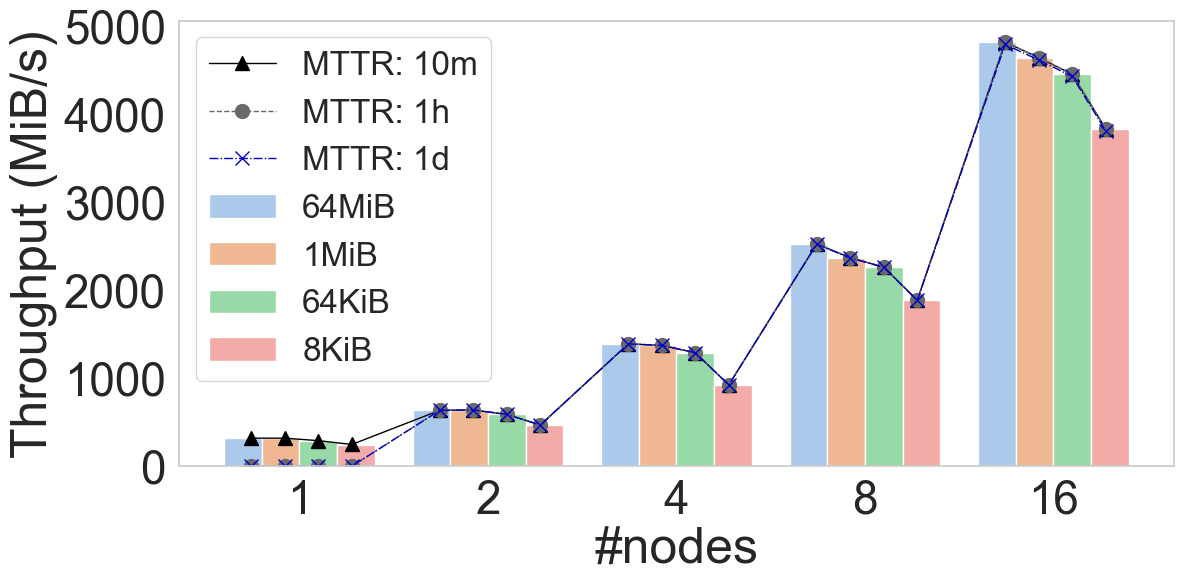

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

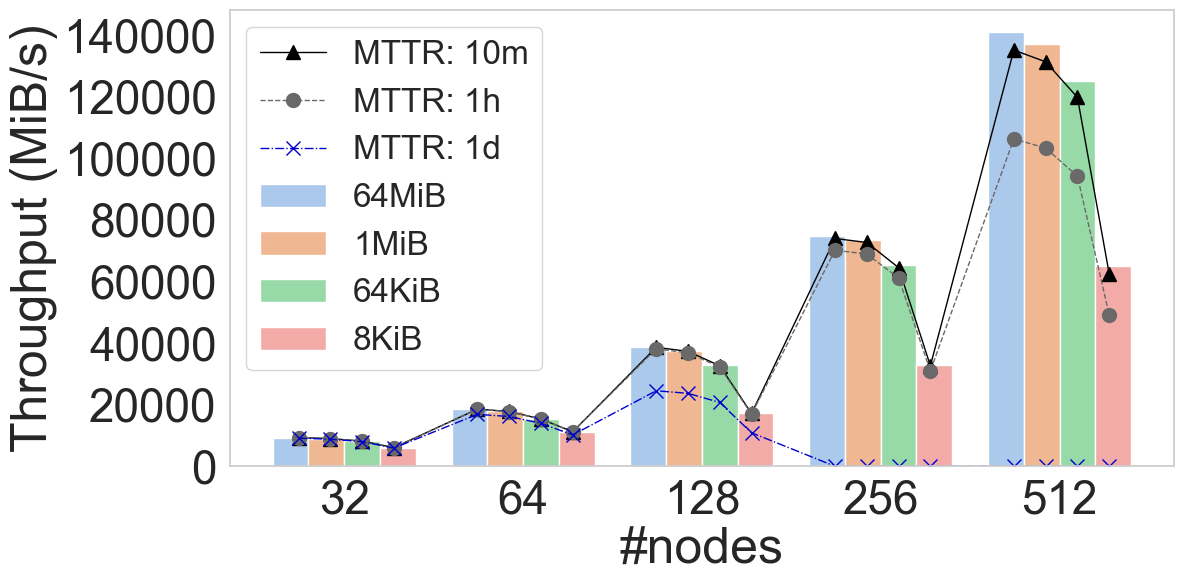

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

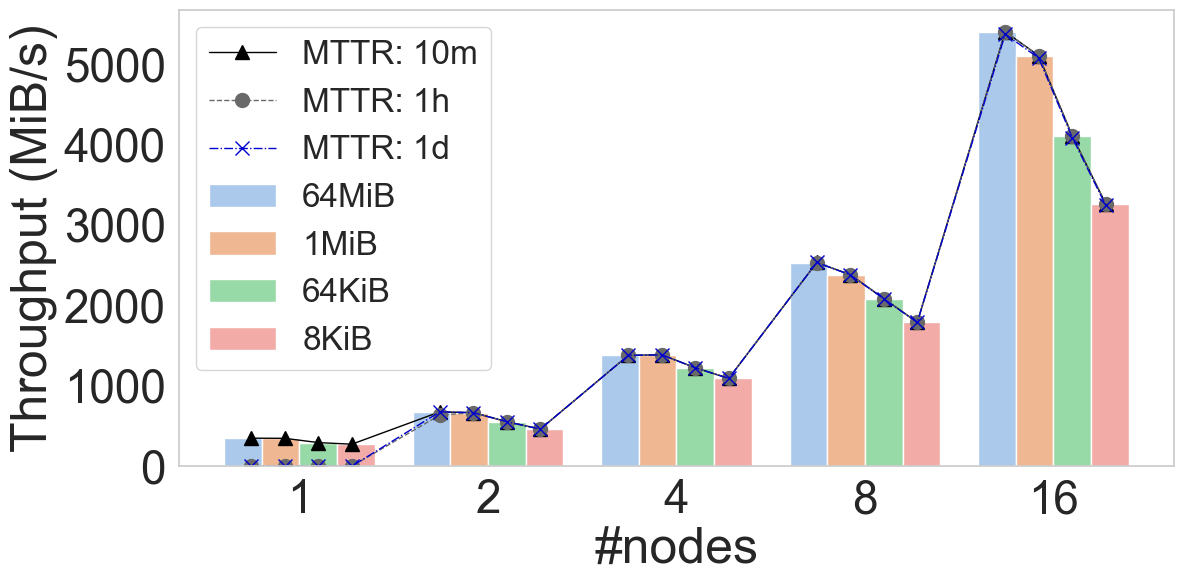

/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['node'] = df['node'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['object_size'] = df['object_size'].astype(str)
/var/folders/62/6b4lt5yn51jggw8lg4qgmys40000gn/T/ipykernel_16686/1176912696.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a Data

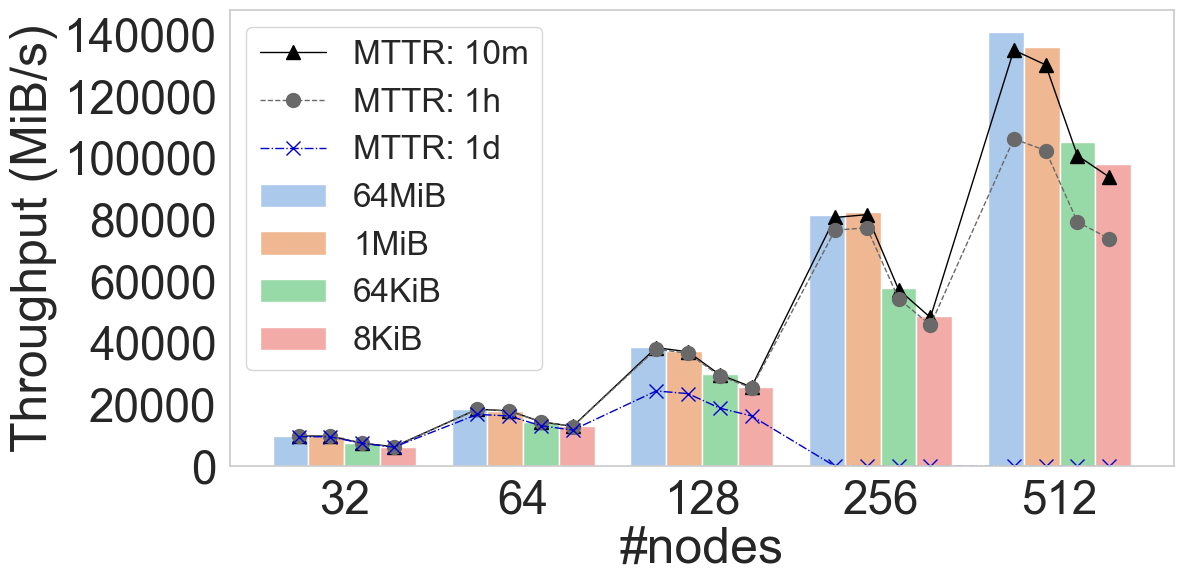

In [913]:
## Load the CSV files into DataFrames for Gekko performance results analysis.
##
## The create_plots function generates bar plots and overlaid line plots to visualize performance metrics
## based on Gekko Rd and Gekko Seq performability results, considering different node configurations.

# Load the CSV files into DataFrames
df1 = pd.read_csv('ExperimentalResults/gekkoRdPerformabilityResults.csv', sep=';')
df2 = pd.read_csv('ExperimentalResults/gekkoSeqPerformabilityResults.csv', sep=';')

def create_plots(df, title, filename):
    """
    Creates bar plots and overlaid line plots to visualize Gekko performance metrics.

    Parameters:
    - df (DataFrame): DataFrame containing Gekko performance data.
    - title (str): Title for the plot.
    - filename (str): File path to save the plot as a PDF.
    """
    
    # Convert to appropriate types
    df['node'] = df['node'].astype(str)
    df['object_size'] = df['object_size'].astype(str)
    df['MTTR'] = df['MTTR'].astype(str)

    # Adding a small constant to all th_performabilitymodel values
    small_constant = 1
    df['th_performabilitymodel_adjusted'] = df['th_performabilitymodel'] + small_constant

    # Plotting
    plt.figure(figsize=(12, 6))

    # Create the bar plot for Mean_gekko
    sns.barplot(x='node', y='Mean_gekko', hue='object_size', data=df, palette='pastel')

    # Unique values for nodes, object sizes, and MTTR
    nodes = df['node'].unique()
    object_sizes = df['object_size'].unique()
    mttrs = df['MTTR'].unique()

    # Number of bars per group
    n_bars = len(object_sizes)

    # Width of a group of bars
    group_width = n_bars / (n_bars + 0.5)

    # Calculate the width of each bar
    bar_width = group_width / len(nodes)

    # Calculate the center position for each bar group
    group_centers = np.arange(len(nodes))

    # Define a list of colors for the lines
    line_colors = ['black', 'dimgray', 'mediumblue']
    # Define a list of markers
    markers = ['^', 'o',  'x', 's', 'D',  'v', '<', '>']
    # Define a list of line styles
    line_styles = ['-', '--', '-.', ':']

    # Define a small offset
    offset = 0.1  # Adjust this value as needed

    # For each MTTR, we plot a line with a specific color, marker, and line style
    for mttr_index, mttr in enumerate(mttrs):
        mttr_values = []
        x_positions = []
        for node_index, node in enumerate(nodes):
            for object_index, object_size in enumerate(object_sizes):
                condition = (df['MTTR'] == mttr) & (df['node'] == node) & (df['object_size'] == object_size)
                mttr_data = df[condition]['th_performabilitymodel_adjusted']
                mttr_values.append(mttr_data.mean() if not mttr_data.empty else np.nan)

                # Calculate x position for the line
                x_pos = group_centers[node_index] - group_width/2 + bar_width/2 + object_index * bar_width + offset
                x_positions.append(x_pos)

        # Use the color, marker, and line style from the lists, cycling if necessary
        color = line_colors[mttr_index % len(line_colors)]
        marker = markers[mttr_index % len(markers)]
        line_style = line_styles[mttr_index % len(line_styles)]

        # Plotting the line with the specified color, marker, and line style
        plt.plot(x_positions, mttr_values, label=f'MTTR: {mttr}', marker=marker, linestyle=line_style, color=color, linewidth=1.0, markersize=10)

    # Customize plotting parameters
    font_size =36
    title_size = 18
    label_size = 36
    plt.ylabel('Throughput (MiB/s)', fontsize=label_size)
    plt.xlabel('#nodes', fontsize=label_size)
    plt.legend(fontsize=24)
    plt.xticks(fontsize=label_size-3)
    plt.yticks(fontsize=label_size-3)
    #plt.yscale('log')
    plt.grid(False)
    plt.tight_layout()
    # Save the figure as a PDF
    plt.savefig(filename, format='pdf', bbox_inches='tight')
    plt.show()

# Filter dataframes for nodes 1 to 32 and 64 to 512
df1_nodes_1_to_32 = df1[df1['node'].astype(int) <= 16]
df1_nodes_64_to_512 = df1[df1['node'].astype(int) >= 32]

df2_nodes_1_to_32 = df2[df2['node'].astype(int) <= 16]
df2_nodes_64_to_512 = df2[df2['node'].astype(int) >= 32]

# Create plots for each filtered DataFrame
create_plots(df1_nodes_1_to_32, 'Gekko Rd Performability Results (Nodes 1 to 32)', 'img/GekkoPerformabilityRd1-16.pdf')
create_plots(df1_nodes_64_to_512, 'Gekko Rd Performability Results (Nodes 64 to 512)', 'img/GekkoPerformabilityRd32-512.pdf')

create_plots(df2_nodes_1_to_32, 'Gekko Seq Performability Results (Nodes 1 to 32)', 'img/GekkoPerformabilitySeq1-16.pdf')
create_plots(df2_nodes_64_to_512, 'Gekko Seq Performability Results (Nodes 64 to 512)', 'img/GekkoPerformabilitySeq32-512.pdf')


<span style="color:red;font-weight:700;font-size:20px">
    As of this point, LQCD and ECMWF case study
</span>

In [424]:
"""
Extracting insights from JSON datasets containing LQCD or ECMWF data.

This script processes JSON files located in the specified base directory ('LQCD' or 'ECMWF')
and aggregates metrics related to write access patterns, I/O sizes, write operations count,
and write volume. It calculates both absolute sums and proportions for access patterns and I/O sizes,
and saves the results into a CSV file named 'LQCD_insights.csv' or 'ECMWF_insights.csv'.

Note: Change the 'base_directory' variable to switch between processing LQCD or ECMWF datasets.

The aggregated metrics include:
- AccessPatternWrite_Sum: Total counts for random, sequential, stride, and unclassified access patterns.
- AccessPatternWrite_Proportion: Proportions of each access pattern category relative to the total count.
- IoSizesWrite_Sum: Total counts for I/O sizes ranging from 0B to 128MB+.
- IoSizesWrite_Proportion: Proportions of each I/O size category relative to the total count.
- OperationsCountWrite: Total count of write operations.
- VolumeWrite: Total volume of write data processed.

The DataFrame 'df' is displayed at the end, summarizing the calculated metrics.

"""

import os
import json
import pandas as pd

# Directory containing the folders
##Change here between ECMWF and LQCD
base_directory = 'LQCD'

# Initialize lists to store aggregated data
accessPatternWrite_agg = [0, 0, 0, 0]  # random, sequential, stride, unclassified
ioSizesWrite_agg = [0, 0, 0, 0, 0, 0, 0]  # [0B, 16B], [16B, 4KB], ..., [128MB, +]
operationsCount_write_agg = 0
volume_write_agg = 0

# Function to process each file
def process_file(file_path, data_type):
    with open(file_path, 'r') as file:
        data = json.load(file)
        for entry in data:
            if data_type == 'accessPatternWrite':
                for i in range(1, 5):  # Skip timestamp, process 4 data points
                    accessPatternWrite_agg[i-1] += entry[i]
            elif data_type == 'ioSizesWrite':
                for i in range(1, 8):  # Skip timestamp, process 7 data points
                    ioSizesWrite_agg[i-1] += entry[i]
            elif data_type == 'operationsCount':
                global operationsCount_write_agg
                operationsCount_write_agg += entry[1]  # Second element is write count
            elif data_type == 'volume':
                global volume_write_agg
                volume_write_agg += entry[2]  # Third element is write volume

# Traverse through the directories and process files
for folder in os.listdir(base_directory):
    folder_path = os.path.join(base_directory, folder)
    if os.path.isdir(folder_path):
        for file in os.listdir(folder_path):
            file_path = os.path.join(folder_path, file)
            if 'accessPatternWrite' in file:
                process_file(file_path, 'accessPatternWrite')
            elif 'ioSizesWrite' in file:
                process_file(file_path, 'ioSizesWrite')
            elif 'operationsCount' in file:
                process_file(file_path, 'operationsCount')
            elif 'volume' in file:
                process_file(file_path, 'volume')

# Calculate proportions for accessPatternWrite and ioSizesWrite
accessPatternWrite_proportion = [x / sum(accessPatternWrite_agg) for x in accessPatternWrite_agg]
ioSizesWrite_proportion = [x / sum(ioSizesWrite_agg) for x in ioSizesWrite_agg]

# Create a DataFrame and save to CSV
df = pd.DataFrame({
    'Metric': ['AccessPatternWrite_Sum', 'AccessPatternWrite_Proportion', 
               'IoSizesWrite_Sum', 'IoSizesWrite_Proportion', 
               'OperationsCountWrite', 'VolumeWrite'],
    'Value': [accessPatternWrite_agg, accessPatternWrite_proportion, 
              ioSizesWrite_agg, ioSizesWrite_proportion, 
              operationsCount_write_agg, volume_write_agg]
})

##Change here between ECMWF and LQCD
df.to_csv('ExperimentalResults/LQCD_insights.csv', index=False)

# Displaying the DataFrame
df


Metric  \
0         AccessPatternWrite_Sum   
1  AccessPatternWrite_Proportion   
2               IoSizesWrite_Sum   
3        IoSizesWrite_Proportion   
4           OperationsCountWrite   
5                    VolumeWrite   

                                               Value  
0                             [0, 911080, 360, 2101]  
1  [0.0, 0.9973060869736553, 0.000394070983130478...  
2                  [17, 137, 839151, 74236, 0, 0, 0]  
3  [1.8608907536717016e-05, 0.0001499659019135430...  
4                                             164392  
5                                        26577730577

In [449]:
"""
Performing composite desirability calculation using LQCD and ECMWF performability results.

This script loads a CSV file containing node combinations and performability metrics
from 'node_combinationsLQCDECMWF.csv', calculates individual desirability scores for each metric,
and then computes a composite desirability score using the geometric mean of normalized desirabilities.
The results are saved into a new CSV file named 'updated_node_combinationsLQCDECMWF.csv'.

Desirability scores are calculated as follows:
- For performance metrics ('Performability_Combined_10m', 'Performability_Combined_1h', 'Performability_Combined_1d'):
  - Higher values are considered better (high_best=True).
- For node counts ('Number_Nodes_ECMWF', 'Number_Nodes_LQCD'):
  - Lower values are considered better (high_best=False).

The composite desirability is computed using the geometric mean of the normalized desirabilities
across all five factors (three performance metrics and two node counts).

"""

import pandas as pd

# Load the CSV
df = pd.read_csv('ExperimentalResults/node_combinationsLQCDECMWF.csv', sep=';')

# Function to calculate individual desirability
def desirability(value, high_best=True, low=0, high=1):
    if high_best:
        return (value - low) / (high - low)
    else:
        return (high - value) / (high - low)

# Calculation of composite desirability
performability_10m_max = df['Performability_Combined_10m'].max()
performability_1h_max = df['Performability_Combined_1h'].max()
performability_1d_max = df['Performability_Combined_1d'].max()
nodes_ecmwf_max = df['Number_Nodes_ECMWF'].max()
nodes_lqcd_max = df['Number_Nodes_LQCD'].max()

calc_df = pd.DataFrame()
calc_df['Desirability_Performability_10m'] = df['Performability_Combined_10m'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_10m_max))
calc_df['Desirability_Performability_1h'] = df['Performability_Combined_1h'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_1h_max))
calc_df['Desirability_Performability_1d'] = df['Performability_Combined_1d'].apply(lambda x: desirability(x, high_best=True, low=0, high=performability_1d_max))
calc_df['Desirability_Nodes_ECMWF'] = df['Number_Nodes_ECMWF'].apply(lambda x: desirability(x, high_best=False, low=0, high=nodes_ecmwf_max))
calc_df['Desirability_Nodes_LQCD'] = df['Number_Nodes_LQCD'].apply(lambda x: desirability(x, high_best=False, low=0, high=nodes_lqcd_max))

# Calculate Composite Desirability using geometric mean
n_factors = 5
calc_df['CompositeDesirability'] = (calc_df['Desirability_Performability_10m'] * calc_df['Desirability_Performability_1h'] * calc_df['Desirability_Performability_1d'] * calc_df['Desirability_Nodes_ECMWF'] * calc_df['Desirability_Nodes_LQCD']) ** (1/n_factors)

# Add the composite desirability to the original DataFrame
df = pd.concat([df, calc_df['CompositeDesirability']], axis=1)

# Sort DataFrame based on CompositeDesirability in descending order and reset index
df_sorted = df.sort_values(by='CompositeDesirability', ascending=False).reset_index(drop=True)

# Save the sorted DataFrame to a new CSV file
df_sorted.to_csv('ExperimentalResults/updated_node_combinationsLQCDECMWF.csv', index=False)


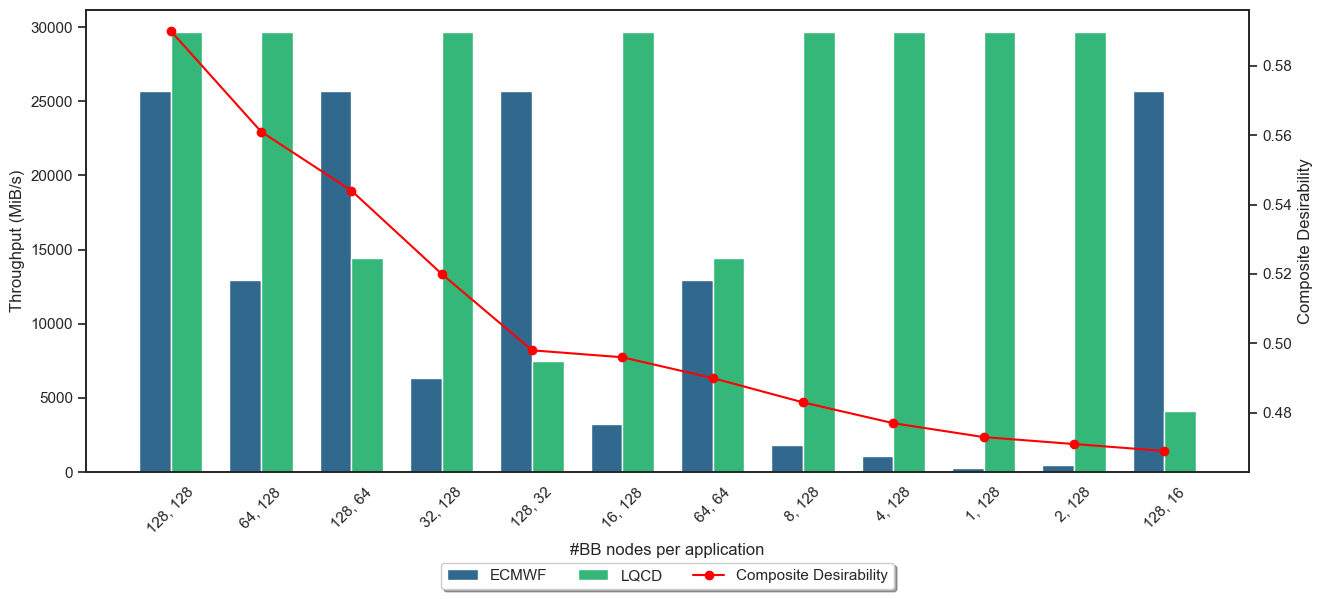

In [869]:
"""
Plotting composite desirability using LQCD and ECMWF performability results.

This script generates a bar plot showing the performance of ECMWF and LQCD
applications across different numbers of BB nodes per application. Additionally,
it overlays a line plot representing the composite desirability of each node combination.

Data:
- 'Number_Nodes_ECMWF': Number of nodes for ECMWF application.
- 'Performance_ECMWF_10m': Throughput performance for ECMWF application over 10 minutes.
- 'Number_Nodes_LQCD': Number of nodes for LQCD application.
- 'Performance_LQCD_10m': Throughput performance for LQCD application over 10 minutes.
- 'Composite_Desirability': Composite desirability score for each node combination.

"""

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Data
data = {
    'Number_Nodes_ECMWF': [128, 64, 128, 32, 128, 16, 64, 8, 4, 1, 2, 128],
    'Performance_ECMWF_10m': [25710.49, 12922.84, 25710.49, 6324.83, 25710.49, 3262.02, 12922.84, 1789.24, 1091.75, 273.29, 460.76, 25710.49],
    'Number_Nodes_LQCD': [128, 128, 64, 128, 32, 128, 64, 128, 128, 128, 128, 16],
    'Performance_LQCD_10m': [29680.79, 29680.79, 14441.09, 29680.79, 7460.96, 29680.79, 14441.09, 29680.79, 29680.79, 29680.79, 29680.79, 4110.26],
    'Composite_Desirability': [0.590, 0.561, 0.544, 0.520, 0.498, 0.496, 0.490, 0.483, 0.477, 0.473, 0.471, 0.469]
}

df = pd.DataFrame(data)

# Seaborn style
sns.set(style="white")

# Figure size
fig, ax = plt.subplots(figsize=(15, 6))
ax2 = ax.twinx()

# Bar settings
bar_width = 0.35
index = np.arange(df.shape[0])

# Define a color palette
palette = sns.color_palette("viridis", n_colors=2)  # You can choose any palette

# Plotting the bars
bar1 = ax.bar(index - bar_width/2, df['Performance_ECMWF_10m'], bar_width, label='Performance ECMWF 10m', color=palette[0])
bar2 = ax.bar(index + bar_width/2, df['Performance_LQCD_10m'], bar_width, label='Performance LQCD 10m', color=palette[1])

# Plotting the Composite Desirability line
line1, = ax2.plot(index, df['Composite_Desirability'], color='red', label='Composite Desirability', marker='o')

# Axis settings
ax.set_xlabel('#BB nodes per application')
ax.set_ylabel('Throughput (MiB/s)')
ax.set_xticks(index)
ax.set_xticklabels(df['Number_Nodes_ECMWF'].astype(str) + ', ' + df['Number_Nodes_LQCD'].astype(str), rotation=45)
ax2.set_ylabel('Composite Desirability')

# Disable grid
ax.grid(False)
ax2.grid(False)

# Create combined legend
handles, labels = [bar1, bar2, line1], ['ECMWF', 'LQCD', 'Composite Desirability']
ax.legend(handles, labels, loc='upper center', bbox_to_anchor=(0.5, -0.18), shadow=True, ncol=3)

plt.savefig('img/CompositeDesirability.pdf', bbox_inches='tight')
plt.show()
